## BA Assignment 6
### Problem 1: Student Application Data(Redo)
*The Student Application Dataset contains the information of the students who are ready for
their college life. Your job is to help the marketing team of the University to target on specific
students so that they can heavily concentrate their effort by focusing on the right set of
students. (This dataset needs to be cleaned before using)*

Questions:
Using a classification model:
1. Run 3 model to predict if a student will apply to university or not.
2. Create 90:10 split and validate those models using ratio of correct predictions vs total predictions.
3. Create 70:30 split and validate those models using ratio of correct predictions vs total predictions.
4. Asses those 3 model using performance metrics such as accuracy, precision, recall, F-score and G-score.
5. Select the best model and give actionable recommendation to the marketing department. 


In [1]:
DF = read.csv("https://raw.githubusercontent.com/jcbonilla/BusinessAnalytics/master/BAData/Univ%20Admissions.csv",na.strings = c("","NA"))

In [2]:
dim(DF)
summary(DF)

[1] 225015     10

 x.Country        x.State        x.Gender     
 USA :224938   NY     :66432   Female:113149  
 NA's:    77   NJ     :54054   Male  : 91716  
               CT     :39603   NA's  : 20150  
               MA     :20081                  
               MD     :18177                  
               (Other):26645                  
               NA's   :   23                  
                          x.Source         x.GPA             x.SAT_Score    
 NRCCUA-PurchaseNames         :67504   Min.   :2.0      930 - 1070 : 17754  
 CollegeBoard-Senior_Search   :54224   1st Qu.:3.0      1080 - 1350: 14872  
 CollegeBoard-Juniors_Search  :50921   Median :3.0      1360 - 1530:  2024  
 CollegeBoard-Sophomore_Search:17372   Mean   :3.1      930 - 980  :   156  
 ACT-Other                    : 7953   3rd Qu.:3.3      990 - 1040 :     8  
 CollegeBoard-Other           : 7493   Max.   :4.0      (Other)    :    25  
 (Other)                      :19548   NA's   :115756   NA's       :190176  
 x.Dista

In [3]:
#check null values 
cat("There are",nrow(DF[!complete.cases(DF),]), "rows with NA values","\n")
cat("There are", sum(is.na(DF)),"NA cells in whole data")

There are 190241 rows with NA values 
There are 327135 NA cells in whole data

> ### As we can see all the NA's. we have to clean it before we move ahead.

## Making dummy variables for  Status:
> ###  *Assuming that all the students are suspect and all the applicants were prospects and suspects*

In [4]:
#since all the students in the data are going to be suspect 
DF$suspect = 1
DF$prospect = 0
DF$applicant =0

DF[DF$x.Status.1=="APPLICANT","applicant"] = 1
DF[DF$x.Status.1=="APPLICANT" | DF$x.Status.1=="PROSPECT","prospect"] = 1

DF$suspect = as.factor(as.character(DF$suspect))
DF$prospect = as.factor(as.character(DF$prospect))
DF$applicant = as.factor(as.character(DF$applicant))

In [5]:
#Levels in SAT scores are range and they are not correctly put as there are repeting numbers between range.
levels(DF$x.SAT_Score)
DF = DF[,-which(names(DF) %in% c("x.SAT_Score"))]

[1] "1050 - 1100" "1080 - 1350" "1110 - 1160" "1170 - 1220" "1230 - 1280"
 [6] "1290 - 1340" "1350 - 1400" "1360 - 1530" "1410 - 1460" "930 - 1070" 
[11] "930 - 980"   "990 - 1040"

> ### We deleted SAT Score column as it is inconsistent.

## NA in Country with available State information:
> ### Replacing them with Country the state belongs to.

In [6]:
#since they are all in state AL but have missing Country column
DF[is.na(DF$x.Country) & !is.na(DF$x.State),"x.Country"] = "USA"

#deleting the leftover rows with NA state
new_DF = DF[!is.na(DF$x.State),]

> ## Next step would be to get rid of NA values in gender as there is no effective imputation method for a category of this sort

In [7]:
# REMOVING NA in gender
new_DF= new_DF[!is.na(new_DF$x.Gender),]

## Imputation with NA in GPA:
> ## We will impute average GPA by the state for all the NA GPA values


In [8]:
state = levels(new_DF$x.State)

for (a in 1:length(state)){
    new_DF[is.na(new_DF$x.GPA) & new_DF$x.State == state[a] 
           ,"x.GPA"] = mean(new_DF[!is.na(new_DF$x.GPA) & new_DF$x.State == state[a] 
                                   ,"x.GPA"])
}

> ### "HI" and "UT" has no instance with GPA values in them so we will delete those instances.

In [9]:
#deleting the leftover rows with NA GPA
new_DF= new_DF[!is.na(new_DF$x.GPA),]

## Imputing mean in NA values in Distance from campus

In [10]:
# Imputing Mean Distance Campus miles for NA places

for (a in 1:length(state)){
    new_DF[is.na(new_DF$x.DistancetoCampus_miles) & new_DF$x.State == state[a] 
           ,"x.DistancetoCampus_miles"] = 
    mean(new_DF[!is.na(new_DF$x.DistancetoCampus_miles) & new_DF$x.State == state[a] 
                ,"x.DistancetoCampus_miles"])
}

## Deleting variables which has no variability i.e which has 1 level :

In [11]:
#Taking the variable out which has no variability i.e 1 level 
new_DF1= new_DF[,-which(names(new_DF) %in% c("x.Country","x.Status.1","suspect"))]

## Deleting sources with less than 5 instances in the whole data

In [12]:
tim = summary(new_DF1$x.Source)
tim
tim[28]

ACT-Juniors_Search                   ACT-No Data 
                          808                             0 
                    ACT-Other             ACT-Senior_Search 
                         7898                           695 
  CollegeBoard-Juniors_Search          CollegeBoard-No Data 
                        49308                            16 
           CollegeBoard-Other        CollegeBoard-Prospects 
                         7430                             7 
   CollegeBoard-PurchaseNames    CollegeBoard-Senior_Search 
                           47                         54122 
CollegeBoard-Sophomore_Search                       No Data 
                        15876                          1884 
        NRCCUA-Juniors_Search                NRCCUA-No Data 
                            5                            16 
                 NRCCUA-Other              NRCCUA-Prospects 
                           21                             9 
         NRCCUA-PurchaseNames          NRCCUA-Senior_Search 
                        61235                             9 
      NRCCUA-Sophomore_Search      Prospects-Juniors_Search 
                            4                             7 
            Prospects-No Data               Prospects-Other 
                           30                            12 
          Prospects-Prospects       Prospects-PurchaseNames 
                         3304                            23 
      Prospects-Senior_Search    Prospects-Sophomore_Search 
                           10                             2 
        PurchaseNames-No Data           PurchaseNames-Other 
                            0                             1 
  PurchaseNames-PurchaseNames 
                         2062

PurchaseNames-Other 
                  1

In [13]:
new_DF1 = new_DF1[!new_DF1$x.Source %in% c("ACT-No Data","Prospects-Sophomore_Search","PurchaseNames-No Data","PurchaseNames-Other"),]

In [14]:
summary(new_DF1$x.Source)

ACT-Juniors_Search                   ACT-No Data 
                          808                             0 
                    ACT-Other             ACT-Senior_Search 
                         7898                           695 
  CollegeBoard-Juniors_Search          CollegeBoard-No Data 
                        49308                            16 
           CollegeBoard-Other        CollegeBoard-Prospects 
                         7430                             7 
   CollegeBoard-PurchaseNames    CollegeBoard-Senior_Search 
                           47                         54122 
CollegeBoard-Sophomore_Search                       No Data 
                        15876                          1884 
        NRCCUA-Juniors_Search                NRCCUA-No Data 
                            5                            16 
                 NRCCUA-Other              NRCCUA-Prospects 
                           21                             9 
         NRCCUA-PurchaseNames          NRCCUA-Senior_Search 
                        61235                             9 
      NRCCUA-Sophomore_Search      Prospects-Juniors_Search 
                            4                             7 
            Prospects-No Data               Prospects-Other 
                           30                            12 
          Prospects-Prospects       Prospects-PurchaseNames 
                         3304                            23 
      Prospects-Senior_Search    Prospects-Sophomore_Search 
                           10                             0 
        PurchaseNames-No Data           PurchaseNames-Other 
                            0                             0 
  PurchaseNames-PurchaseNames 
                         2062

## Dealing with INF values in Household Income:

In [15]:
new_DF1 = new_DF1[!is.infinite(new_DF1$x.HouseholdIncome),]


In [16]:
summary(new_DF1$x.State)

AK    AL    AR    AZ    CA    CO    CT    DC    DE    FL    GA    HI    IA 
    5    53    39    19   751    20 35380    63    24   221   105     0     6 
   ID    IL    IN    KS    KY    LA    MA    MD    ME    MI    MN    MO    MS 
    4 13135    59    12    22    71 19040 17688    37    51     5    38    42 
   MT    NC    ND    NE    NH    NJ    NM    NV    NY    OH    OK    OR    PA 
    2   156     2     8  4331 50177     3     9 57969    64    15     5  2867 
   RI    SC    SD    TN    TX    UT    VA    VT    WA    WI    WV    WY 
 1098    56     0    31   100     0   671   345    15    11     4     1

## From the above summary of states we can see there are many states with as low as 0 to 5 count of instances in the whole data. which is too less for modle to learn and predict. We will discard states with less than 5 counts in the whole data. 

In [91]:
new_DF1 = new_DF1[!new_DF1$x.State %in% c("WY","WV","UT","SD","OR","NM","ND","MT","MN","ID","HI","AK"),]

In [94]:
summary(new_DF1)

    x.State        x.Gender                               x.Source    
 NY     :57969   Female:113101   NRCCUA-PurchaseNames         :61223  
 NJ     :50177   Male  : 91698   CollegeBoard-Senior_Search   :54117  
 CT     :35380                   CollegeBoard-Juniors_Search  :49303  
 MA     :19040                   CollegeBoard-Sophomore_Search:15875  
 MD     :17688                   ACT-Other                    : 7898  
 IL     :13135                   CollegeBoard-Other           : 7429  
 (Other):11410                   (Other)                      : 8954  
     x.GPA       x.DistancetoCampus_miles x.HouseholdIncome    x.InState 
 Min.   :2.000   Min.   :   0.0516        Min.   : 2.004e+04   N:169419  
 1st Qu.:3.000   1st Qu.:  44.0020        1st Qu.: 5.880e+04   Y: 35380  
 Median :3.064   Median :  64.0765        Median : 8.919e+04             
 Mean   :3.095   Mean   : 146.0441        Mean   :2.856e+143             
 3rd Qu.:3.127   3rd Qu.: 140.5899        3rd Qu.: 1.161e+05  


## 2. Create 70:30 split and validate those models using ratio of correct predictions vs total predictions.

## Splitting dataset into Test and Train data:

In [95]:

## 70% of the sample size
smp_size <- floor(0.70 * nrow(new_DF1))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(new_DF1)), size = smp_size)

Train <- new_DF1[train_ind, ]
Test <- new_DF1[-train_ind, ]

row.names(Train) = NULL
row.names(Test)= NULL

In [96]:
dim(Train)

[1] 143359      9

In [97]:
dim(Test)

[1] 61440     9

In [98]:
# Proportion of class in the target
prop.table(table(Train$applicant))



         0          1 
0.96450868 0.03549132 

In [99]:
summary(Train)

    x.State        x.Gender                              x.Source    
 NY     :40645   Female:79190   NRCCUA-PurchaseNames         :42950  
 NJ     :35274   Male  :64169   CollegeBoard-Senior_Search   :37834  
 CT     :24680                  CollegeBoard-Juniors_Search  :34401  
 MA     :13373                  CollegeBoard-Sophomore_Search:11128  
 MD     :12383                  ACT-Other                    : 5578  
 IL     : 9084                  CollegeBoard-Other           : 5178  
 (Other): 7920                  (Other)                      : 6290  
     x.GPA       x.DistancetoCampus_miles x.HouseholdIncome    x.InState 
 Min.   :2.000   Min.   :   0.0516        Min.   : 2.004e+04   N:118679  
 1st Qu.:3.000   1st Qu.:  44.0131        1st Qu.: 5.867e+04   Y: 24680  
 Median :3.064   Median :  64.0110        Median : 8.904e+04             
 Mean   :3.095   Mean   : 144.9811        Mean   :4.081e+143             
 3rd Qu.:3.127   3rd Qu.: 140.3760        3rd Qu.: 1.160e+05          

## We can see from 96.5 % non-applicant and 3.5% applicant that data is highly unbalanced. 

## Lets try some of the balancing techniques: Over sampling, Under sampling  and both

In [54]:
install.packages("ROSE")

package 'ROSE' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\shrey\AppData\Local\Temp\Rtmp84En8Q\downloaded_packages


In [21]:
library(ROSE)

Loaded ROSE 0.0-3



In [58]:
#Over Sampling
set.seed(222)
over_sam= ovun.sample(applicant~.,data = Train, method = "over", N=138246*2)$data
table(over_sam$applicant)


     0      1 
138246 138246 

In [101]:
# Under Sampling
set.seed(222)
under_sam= ovun.sample(applicant~.,data = Train, method = "under", N=5088*2)$data
table(under_sam$applicant)


   0    1 
5088 5088 

In [48]:
install.packages("caret", dependencies=c("Depends", "Suggests"))

package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\shrey\AppData\Local\Temp\Rtmp84En8Q\downloaded_packages


In [49]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [ ]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

## 1. Run 3 model to predict if a student will apply to university or not.

### We will use the training data we made from under sampling for all the models from here onwards.

## MODEL 1 : CART

In [102]:
# CART
set.seed(7)
fit.cart <- train(applicant~., data=under_sam, method="rpart")

In [123]:
# estimate skill of CART on the validation dataset
predictions_cart <- predict(fit.cart, Test)
confusionMatrix(predictions_cart, Test$applicant, positive ='1')

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 57840     0
         1  1459  2141
                                         
               Accuracy : 0.9763         
                 95% CI : (0.975, 0.9774)
    No Information Rate : 0.9652         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7342         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 1.00000        
            Specificity : 0.97540        
         Pos Pred Value : 0.59472        
         Neg Pred Value : 1.00000        
             Prevalence : 0.03485        
         Detection Rate : 0.03485        
   Detection Prevalence : 0.05859        
      Balanced Accuracy : 0.98770        
                                         
       'Positive' Class : 1              
                                      

In [35]:
saveRDS(fit.cart, "C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\CART_model.rds")

## MODEL 2: GLM

In [104]:
#Ignore the fit.gbm name on glm model
set.seed(7)
fit.gbm <- train(applicant~., data=under_sam, method="glm")

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a

In [126]:
# estimate skill of glm on the validation dataset
predictions_glm <- predict(fit.gbm, Test)
confusionMatrix(predictions_glm, Test$applicant, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 57840     0
         1  1459  2141
                                         
               Accuracy : 0.9763         
                 95% CI : (0.975, 0.9774)
    No Information Rate : 0.9652         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7342         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 1.00000        
            Specificity : 0.97540        
         Pos Pred Value : 0.59472        
         Neg Pred Value : 1.00000        
             Prevalence : 0.03485        
         Detection Rate : 0.03485        
   Detection Prevalence : 0.05859        
      Balanced Accuracy : 0.98770        
                                         
       'Positive' Class : 1              
                                      

In [34]:
saveRDS(fit.gbm, "C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\glm_model.rds")

## MODEL 3: GBM

In [106]:
# #Ignore the fit.glm name on gbm model it was supposed to be fit.gbm (due to hours of training changing wasnt feasible)
set.seed(7)
fit.glm <- train(applicant~., data=under_sam, method="gbm")

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 2: x.StateAR has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 25: x.StateMS has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2038             nan     0.1000    0.0909
     2        1.0554             nan     0.1000    0.0744
     3        0.9311             nan     0.1000    0.0620
     4        0.8261             nan     0.1000    0.0523
     5        0.7371             nan     0.1000    0.0446
     6        0.6605             nan     0.1000    0.0383
     7        0.5942             nan     0.1000    0.0331
     8        0.5365             nan     0.1000    0.0288
     9        0.4863             nan     0.1000    0.0251
    10        0.4424             nan     0.1000    0.0219
    20        0.2071             nan     0.1000    0.0064
    40        0.1156             nan     0.1000    0.0005
    60        0.1025             nan     0.1000    0.0001
    80        0.0974             nan     0.1000    0.0000
   100        0.0943             nan     0.1000   -0.0001
   120        0.0923             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 2: x.StateAR has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 25: x.StateMS has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2042             nan     0.1000    0.0911
     2        1.0554             nan     0.1000    0.0746
     3        0.9317             nan     0.1000    0.0621
     4        0.8267             nan     0.1000    0.0524
     5        0.7377             nan     0.1000    0.0447
     6        0.6609             nan     0.1000    0.0384
     7        0.5946             nan     0.1000    0.0332
     8        0.5368             nan     0.1000    0.0289
     9        0.4865             nan     0.1000    0.0252
    10        0.4422             nan     0.1000    0.0221
    20        0.2047             nan     0.1000    0.0065
    40        0.1084             nan     0.1000    0.0007
    60        0.0948             nan     0.1000   -0.0000
    80        0.0862             nan     0.1000    0.0003
   100        0.0810             nan     0.1000    0.0000
   120        0.0765             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 2: x.StateAR has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 25: x.StateMS has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2043             nan     0.1000    0.0911
     2        1.0553             nan     0.1000    0.0745
     3        0.9308             nan     0.1000    0.0621
     4        0.8263             nan     0.1000    0.0523
     5        0.7371             nan     0.1000    0.0447
     6        0.6603             nan     0.1000    0.0384
     7        0.5942             nan     0.1000    0.0332
     8        0.5367             nan     0.1000    0.0289
     9        0.4862             nan     0.1000    0.0252
    10        0.4418             nan     0.1000    0.0221
    20        0.2031             nan     0.1000    0.0065
    40        0.1031             nan     0.1000    0.0006
    60        0.0864             nan     0.1000   -0.0001
    80        0.0802             nan     0.1000   -0.0000
   100        0.0698             nan     0.1000   -0.0000
   120        0.0646             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2047             nan     0.1000    0.0904
     2        1.0564             nan     0.1000    0.0740
     3        0.9336             nan     0.1000    0.0616
     4        0.8294             nan     0.1000    0.0520
     5        0.7409             nan     0.1000    0.0443
     6        0.6648             nan     0.1000    0.0381
     7        0.5992             nan     0.1000    0.0329
     8        0.5419             nan     0.1000    0.0286
     9        0.4919             nan     0.1000    0.0250
    10        0.4482             nan     0.1000    0.0218
    20        0.2152             nan     0.1000    0.0063
    40        0.1258             nan     0.1000    0.0003
    60        0.1126             nan     0.1000   -0.0000
    80        0.1065             nan     0.1000    0.0000
   100        0.1029             nan     0.1000    0.0000
   120        0.1009             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2054             nan     0.1000    0.0904
     2        1.0570             nan     0.1000    0.0741
     3        0.9340             nan     0.1000    0.0618
     4        0.8295             nan     0.1000    0.0520
     5        0.7403             nan     0.1000    0.0444
     6        0.6641             nan     0.1000    0.0380
     7        0.5980             nan     0.1000    0.0329
     8        0.5408             nan     0.1000    0.0287
     9        0.4910             nan     0.1000    0.0250
    10        0.4468             nan     0.1000    0.0218
    20        0.2116             nan     0.1000    0.0064
    40        0.1170             nan     0.1000    0.0004
    60        0.1029             nan     0.1000    0.0002
    80        0.0949             nan     0.1000   -0.0000
   100        0.0896             nan     0.1000   -0.0000
   120        0.0843             nan     0.1000    0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2056             nan     0.1000    0.0904
     2        1.0573             nan     0.1000    0.0741
     3        0.9334             nan     0.1000    0.0618
     4        0.8288             nan     0.1000    0.0521
     5        0.7399             nan     0.1000    0.0445
     6        0.6633             nan     0.1000    0.0381
     7        0.5973             nan     0.1000    0.0330
     8        0.5403             nan     0.1000    0.0287
     9        0.4902             nan     0.1000    0.0250
    10        0.4461             nan     0.1000    0.0219
    20        0.2101             nan     0.1000    0.0065
    40        0.1098             nan     0.1000    0.0008
    60        0.0929             nan     0.1000    0.0002
    80        0.0854             nan     0.1000   -0.0000
   100        0.0785             nan     0.1000   -0.0000
   120        0.0734             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 2: x.StateAR has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2045             nan     0.1000    0.0907
     2        1.0559             nan     0.1000    0.0743
     3        0.9321             nan     0.1000    0.0619
     4        0.8275             nan     0.1000    0.0522
     5        0.7383             nan     0.1000    0.0445
     6        0.6623             nan     0.1000    0.0382
     7        0.5965             nan     0.1000    0.0330
     8        0.5394             nan     0.1000    0.0287
     9        0.4890             nan     0.1000    0.0251
    10        0.4452             nan     0.1000    0.0219
    20        0.2102             nan     0.1000    0.0064
    40        0.1195             nan     0.1000    0.0007
    60        0.1055             nan     0.1000    0.0003
    80        0.0984             nan     0.1000   -0.0000
   100        0.0947             nan     0.1000   -0.0000
   120        0.0922             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 2: x.StateAR has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2036             nan     0.1000    0.0908
     2        1.0550             nan     0.1000    0.0743
     3        0.9315             nan     0.1000    0.0619
     4        0.8274             nan     0.1000    0.0523
     5        0.7380             nan     0.1000    0.0446
     6        0.6613             nan     0.1000    0.0383
     7        0.5951             nan     0.1000    0.0331
     8        0.5381             nan     0.1000    0.0288
     9        0.4877             nan     0.1000    0.0251
    10        0.4434             nan     0.1000    0.0219
    20        0.2068             nan     0.1000    0.0065
    40        0.1101             nan     0.1000    0.0006
    60        0.0956             nan     0.1000    0.0000
    80        0.0883             nan     0.1000   -0.0000
   100        0.0820             nan     0.1000    0.0001
   120        0.0755             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 2: x.StateAR has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2042             nan     0.1000    0.0909
     2        1.0550             nan     0.1000    0.0745
     3        0.9310             nan     0.1000    0.0620
     4        0.8260             nan     0.1000    0.0522
     5        0.7371             nan     0.1000    0.0445
     6        0.6600             nan     0.1000    0.0383
     7        0.5936             nan     0.1000    0.0331
     8        0.5360             nan     0.1000    0.0288
     9        0.4856             nan     0.1000    0.0252
    10        0.4418             nan     0.1000    0.0220
    20        0.2034             nan     0.1000    0.0067
    40        0.1028             nan     0.1000    0.0008
    60        0.0861             nan     0.1000    0.0001
    80        0.0764             nan     0.1000   -0.0001
   100        0.0711             nan     0.1000    0.0002
   120        0.0646             nan     0.1000    0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2047             nan     0.1000    0.0909
     2        1.0563             nan     0.1000    0.0744
     3        0.9321             nan     0.1000    0.0619
     4        0.8278             nan     0.1000    0.0523
     5        0.7388             nan     0.1000    0.0445
     6        0.6627             nan     0.1000    0.0383
     7        0.5963             nan     0.1000    0.0331
     8        0.5385             nan     0.1000    0.0287
     9        0.4886             nan     0.1000    0.0251
    10        0.4444             nan     0.1000    0.0219
    20        0.2100             nan     0.1000    0.0064
    40        0.1186             nan     0.1000    0.0007
    60        0.1051             nan     0.1000    0.0002
    80        0.0992             nan     0.1000   -0.0000
   100        0.0959             nan     0.1000    0.0001
   120        0.0946             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2041             nan     0.1000    0.0908
     2        1.0548             nan     0.1000    0.0743
     3        0.9307             nan     0.1000    0.0618
     4        0.8259             nan     0.1000    0.0522
     5        0.7372             nan     0.1000    0.0445
     6        0.6607             nan     0.1000    0.0382
     7        0.5949             nan     0.1000    0.0330
     8        0.5369             nan     0.1000    0.0287
     9        0.4866             nan     0.1000    0.0250
    10        0.4429             nan     0.1000    0.0219
    20        0.2070             nan     0.1000    0.0065
    40        0.1106             nan     0.1000    0.0007
    60        0.0973             nan     0.1000    0.0002
    80        0.0902             nan     0.1000    0.0002
   100        0.0852             nan     0.1000   -0.0000
   120        0.0809             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2048             nan     0.1000    0.0907
     2        1.0558             nan     0.1000    0.0744
     3        0.9314             nan     0.1000    0.0621
     4        0.8265             nan     0.1000    0.0523
     5        0.7369             nan     0.1000    0.0446
     6        0.6599             nan     0.1000    0.0383
     7        0.5943             nan     0.1000    0.0330
     8        0.5368             nan     0.1000    0.0288
     9        0.4864             nan     0.1000    0.0250
    10        0.4420             nan     0.1000    0.0220
    20        0.2039             nan     0.1000    0.0066
    40        0.1041             nan     0.1000    0.0007
    60        0.0874             nan     0.1000    0.0003
    80        0.0800             nan     0.1000    0.0002
   100        0.0754             nan     0.1000   -0.0000
   120        0.0702             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2051             nan     0.1000    0.0904
     2        1.0574             nan     0.1000    0.0740
     3        0.9336             nan     0.1000    0.0617
     4        0.8301             nan     0.1000    0.0520
     5        0.7413             nan     0.1000    0.0444
     6        0.6652             nan     0.1000    0.0381
     7        0.5991             nan     0.1000    0.0329
     8        0.5419             nan     0.1000    0.0286
     9        0.4921             nan     0.1000    0.0249
    10        0.4485             nan     0.1000    0.0218
    20        0.2157             nan     0.1000    0.0064
    40        0.1252             nan     0.1000    0.0007
    60        0.1142             nan     0.1000   -0.0000
    80        0.1083             nan     0.1000    0.0000
   100        0.1054             nan     0.1000   -0.0000
   120        0.1022             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2043             nan     0.1000    0.0905
     2        1.0563             nan     0.1000    0.0741
     3        0.9331             nan     0.1000    0.0616
     4        0.8287             nan     0.1000    0.0521
     5        0.7400             nan     0.1000    0.0444
     6        0.6637             nan     0.1000    0.0381
     7        0.5980             nan     0.1000    0.0330
     8        0.5411             nan     0.1000    0.0287
     9        0.4911             nan     0.1000    0.0250
    10        0.4472             nan     0.1000    0.0218
    20        0.2128             nan     0.1000    0.0064
    40        0.1177             nan     0.1000    0.0007
    60        0.1041             nan     0.1000    0.0002
    80        0.0982             nan     0.1000    0.0000
   100        0.0917             nan     0.1000   -0.0000
   120        0.0868             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2051             nan     0.1000    0.0905
     2        1.0559             nan     0.1000    0.0742
     3        0.9328             nan     0.1000    0.0617
     4        0.8286             nan     0.1000    0.0521
     5        0.7395             nan     0.1000    0.0443
     6        0.6632             nan     0.1000    0.0381
     7        0.5972             nan     0.1000    0.0330
     8        0.5398             nan     0.1000    0.0286
     9        0.4899             nan     0.1000    0.0250
    10        0.4457             nan     0.1000    0.0219
    20        0.2093             nan     0.1000    0.0064
    40        0.1101             nan     0.1000    0.0006
    60        0.0928             nan     0.1000   -0.0001
    80        0.0846             nan     0.1000    0.0000
   100        0.0783             nan     0.1000   -0.0002
   120        0.0736             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2056             nan     0.1000    0.0904
     2        1.0572             nan     0.1000    0.0740
     3        0.9337             nan     0.1000    0.0616
     4        0.8297             nan     0.1000    0.0520
     5        0.7413             nan     0.1000    0.0443
     6        0.6650             nan     0.1000    0.0380
     7        0.5992             nan     0.1000    0.0329
     8        0.5419             nan     0.1000    0.0286
     9        0.4922             nan     0.1000    0.0249
    10        0.4489             nan     0.1000    0.0218
    20        0.2156             nan     0.1000    0.0063
    40        0.1257             nan     0.1000    0.0007
    60        0.1118             nan     0.1000    0.0002
    80        0.1056             nan     0.1000   -0.0000
   100        0.1016             nan     0.1000   -0.0001
   120        0.0990             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2052             nan     0.1000    0.0906
     2        1.0571             nan     0.1000    0.0742
     3        0.9336             nan     0.1000    0.0617
     4        0.8294             nan     0.1000    0.0520
     5        0.7409             nan     0.1000    0.0444
     6        0.6643             nan     0.1000    0.0382
     7        0.5983             nan     0.1000    0.0328
     8        0.5409             nan     0.1000    0.0286
     9        0.4914             nan     0.1000    0.0249
    10        0.4476             nan     0.1000    0.0219
    20        0.2120             nan     0.1000    0.0064
    40        0.1164             nan     0.1000    0.0008
    60        0.1020             nan     0.1000    0.0000
    80        0.0931             nan     0.1000   -0.0001
   100        0.0887             nan     0.1000   -0.0000
   120        0.0849             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2057             nan     0.1000    0.0906
     2        1.0580             nan     0.1000    0.0742
     3        0.9337             nan     0.1000    0.0618
     4        0.8295             nan     0.1000    0.0520
     5        0.7403             nan     0.1000    0.0444
     6        0.6643             nan     0.1000    0.0381
     7        0.5984             nan     0.1000    0.0330
     8        0.5405             nan     0.1000    0.0287
     9        0.4899             nan     0.1000    0.0251
    10        0.4459             nan     0.1000    0.0219
    20        0.2096             nan     0.1000    0.0064
    40        0.1107             nan     0.1000    0.0006
    60        0.0950             nan     0.1000    0.0001
    80        0.0854             nan     0.1000    0.0001
   100        0.0790             nan     0.1000   -0.0001
   120        0.0745             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2040             nan     0.1000    0.0911
     2        1.0549             nan     0.1000    0.0746
     3        0.9306             nan     0.1000    0.0622
     4        0.8258             nan     0.1000    0.0525
     5        0.7363             nan     0.1000    0.0447
     6        0.6596             nan     0.1000    0.0384
     7        0.5931             nan     0.1000    0.0332
     8        0.5357             nan     0.1000    0.0289
     9        0.4852             nan     0.1000    0.0252
    10        0.4412             nan     0.1000    0.0221
    20        0.2042             nan     0.1000    0.0065
    40        0.1123             nan     0.1000    0.0007
    60        0.0995             nan     0.1000    0.0001
    80        0.0942             nan     0.1000    0.0002
   100        0.0916             nan     0.1000   -0.0000
   120        0.0900             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2036             nan     0.1000    0.0911
     2        1.0544             nan     0.1000    0.0746
     3        0.9300             nan     0.1000    0.0621
     4        0.8251             nan     0.1000    0.0524
     5        0.7359             nan     0.1000    0.0447
     6        0.6593             nan     0.1000    0.0385
     7        0.5927             nan     0.1000    0.0332
     8        0.5352             nan     0.1000    0.0289
     9        0.4848             nan     0.1000    0.0253
    10        0.4402             nan     0.1000    0.0222
    20        0.2022             nan     0.1000    0.0065
    40        0.1048             nan     0.1000    0.0005
    60        0.0923             nan     0.1000    0.0000
    80        0.0865             nan     0.1000    0.0000
   100        0.0811             nan     0.1000    0.0002
   120        0.0774             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2035             nan     0.1000    0.0913
     2        1.0543             nan     0.1000    0.0746
     3        0.9301             nan     0.1000    0.0622
     4        0.8247             nan     0.1000    0.0525
     5        0.7356             nan     0.1000    0.0447
     6        0.6582             nan     0.1000    0.0384
     7        0.5918             nan     0.1000    0.0333
     8        0.5338             nan     0.1000    0.0290
     9        0.4832             nan     0.1000    0.0253
    10        0.4390             nan     0.1000    0.0221
    20        0.2000             nan     0.1000    0.0065
    40        0.1002             nan     0.1000    0.0006
    60        0.0844             nan     0.1000   -0.0000
    80        0.0749             nan     0.1000   -0.0000
   100        0.0695             nan     0.1000   -0.0000
   120        0.0649             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 29: x.StateNE has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2046             nan     0.1000    0.0909
     2        1.0558             nan     0.1000    0.0744
     3        0.9316             nan     0.1000    0.0619
     4        0.8273             nan     0.1000    0.0523
     5        0.7388             nan     0.1000    0.0447
     6        0.6624             nan     0.1000    0.0383
     7        0.5961             nan     0.1000    0.0331
     8        0.5382             nan     0.1000    0.0288
     9        0.4883             nan     0.1000    0.0251
    10        0.4439             nan     0.1000    0.0220
    20        0.2100             nan     0.1000    0.0065
    40        0.1177             nan     0.1000    0.0004
    60        0.1041             nan     0.1000    0.0002
    80        0.0980             nan     0.1000    0.0002
   100        0.0949             nan     0.1000   -0.0000
   120        0.0926             nan     0.1000    0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 29: x.StateNE has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2043             nan     0.1000    0.0911
     2        1.0552             nan     0.1000    0.0745
     3        0.9312             nan     0.1000    0.0620
     4        0.8262             nan     0.1000    0.0522
     5        0.7371             nan     0.1000    0.0446
     6        0.6603             nan     0.1000    0.0381
     7        0.5940             nan     0.1000    0.0330
     8        0.5363             nan     0.1000    0.0287
     9        0.4858             nan     0.1000    0.0251
    10        0.4420             nan     0.1000    0.0220
    20        0.2058             nan     0.1000    0.0065
    40        0.1097             nan     0.1000    0.0007
    60        0.0941             nan     0.1000    0.0001
    80        0.0854             nan     0.1000    0.0001
   100        0.0808             nan     0.1000   -0.0000
   120        0.0763             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 29: x.StateNE has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2042             nan     0.1000    0.0910
     2        1.0554             nan     0.1000    0.0745
     3        0.9314             nan     0.1000    0.0620
     4        0.8262             nan     0.1000    0.0523
     5        0.7368             nan     0.1000    0.0446
     6        0.6598             nan     0.1000    0.0384
     7        0.5937             nan     0.1000    0.0332
     8        0.5358             nan     0.1000    0.0288
     9        0.4856             nan     0.1000    0.0251
    10        0.4413             nan     0.1000    0.0219
    20        0.2036             nan     0.1000    0.0065
    40        0.1027             nan     0.1000    0.0007
    60        0.0862             nan     0.1000   -0.0000
    80        0.0780             nan     0.1000   -0.0000
   100        0.0731             nan     0.1000    0.0000
   120        0.0693             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2047             nan     0.1000    0.0911
     2        1.0553             nan     0.1000    0.0746
     3        0.9314             nan     0.1000    0.0621
     4        0.8263             nan     0.1000    0.0525
     5        0.7373             nan     0.1000    0.0447
     6        0.6600             nan     0.1000    0.0384
     7        0.5930             nan     0.1000    0.0332
     8        0.5356             nan     0.1000    0.0289
     9        0.4850             nan     0.1000    0.0252
    10        0.4406             nan     0.1000    0.0220
    20        0.2049             nan     0.1000    0.0064
    40        0.1124             nan     0.1000    0.0006
    60        0.1003             nan     0.1000    0.0001
    80        0.0954             nan     0.1000    0.0001
   100        0.0927             nan     0.1000   -0.0000
   120        0.0909             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2038             nan     0.1000    0.0911
     2        1.0550             nan     0.1000    0.0746
     3        0.9309             nan     0.1000    0.0621
     4        0.8259             nan     0.1000    0.0524
     5        0.7363             nan     0.1000    0.0447
     6        0.6595             nan     0.1000    0.0384
     7        0.5929             nan     0.1000    0.0332
     8        0.5351             nan     0.1000    0.0289
     9        0.4845             nan     0.1000    0.0252
    10        0.4407             nan     0.1000    0.0220
    20        0.2030             nan     0.1000    0.0065
    40        0.1062             nan     0.1000    0.0007
    60        0.0923             nan     0.1000    0.0001
    80        0.0863             nan     0.1000    0.0000
   100        0.0818             nan     0.1000   -0.0001
   120        0.0786             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2032             nan     0.1000    0.0912
     2        1.0536             nan     0.1000    0.0745
     3        0.9295             nan     0.1000    0.0620
     4        0.8247             nan     0.1000    0.0523
     5        0.7352             nan     0.1000    0.0447
     6        0.6583             nan     0.1000    0.0384
     7        0.5916             nan     0.1000    0.0332
     8        0.5342             nan     0.1000    0.0289
     9        0.4835             nan     0.1000    0.0253
    10        0.4392             nan     0.1000    0.0220
    20        0.2011             nan     0.1000    0.0065
    40        0.1004             nan     0.1000    0.0009
    60        0.0824             nan     0.1000   -0.0001
    80        0.0759             nan     0.1000   -0.0000
   100        0.0701             nan     0.1000    0.0000
   120        0.0657             nan     0.1000    0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 29: x.StateNE has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2057             nan     0.1000    0.0902
     2        1.0580             nan     0.1000    0.0739
     3        0.9349             nan     0.1000    0.0615
     4        0.8310             nan     0.1000    0.0520
     5        0.7428             nan     0.1000    0.0442
     6        0.6672             nan     0.1000    0.0380
     7        0.6018             nan     0.1000    0.0328
     8        0.5450             nan     0.1000    0.0286
     9        0.4950             nan     0.1000    0.0249
    10        0.4516             nan     0.1000    0.0218
    20        0.2193             nan     0.1000    0.0063
    40        0.1299             nan     0.1000    0.0004
    60        0.1164             nan     0.1000    0.0001
    80        0.1116             nan     0.1000    0.0000
   100        0.1071             nan     0.1000    0.0001
   120        0.1048             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 29: x.StateNE has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2052             nan     0.1000    0.0902
     2        1.0569             nan     0.1000    0.0738
     3        0.9336             nan     0.1000    0.0615
     4        0.8299             nan     0.1000    0.0519
     5        0.7416             nan     0.1000    0.0442
     6        0.6656             nan     0.1000    0.0379
     7        0.6001             nan     0.1000    0.0329
     8        0.5428             nan     0.1000    0.0285
     9        0.4932             nan     0.1000    0.0249
    10        0.4496             nan     0.1000    0.0218
    20        0.2152             nan     0.1000    0.0063
    40        0.1211             nan     0.1000    0.0006
    60        0.1070             nan     0.1000    0.0002
    80        0.0999             nan     0.1000    0.0003
   100        0.0942             nan     0.1000    0.0000
   120        0.0906             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 29: x.StateNE has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2055             nan     0.1000    0.0904
     2        1.0578             nan     0.1000    0.0740
     3        0.9340             nan     0.1000    0.0616
     4        0.8303             nan     0.1000    0.0518
     5        0.7417             nan     0.1000    0.0442
     6        0.6654             nan     0.1000    0.0381
     7        0.5995             nan     0.1000    0.0329
     8        0.5424             nan     0.1000    0.0286
     9        0.4923             nan     0.1000    0.0250
    10        0.4488             nan     0.1000    0.0218
    20        0.2133             nan     0.1000    0.0065
    40        0.1150             nan     0.1000    0.0006
    60        0.0998             nan     0.1000    0.0001
    80        0.0934             nan     0.1000   -0.0001
   100        0.0846             nan     0.1000   -0.0000
   120        0.0785             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 15: x.StateIN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2053             nan     0.1000    0.0904
     2        1.0568             nan     0.1000    0.0741
     3        0.9337             nan     0.1000    0.0616
     4        0.8297             nan     0.1000    0.0520
     5        0.7412             nan     0.1000    0.0443
     6        0.6655             nan     0.1000    0.0381
     7        0.5999             nan     0.1000    0.0330
     8        0.5426             nan     0.1000    0.0286
     9        0.4930             nan     0.1000    0.0249
    10        0.4492             nan     0.1000    0.0218
    20        0.2161             nan     0.1000    0.0063
    40        0.1261             nan     0.1000    0.0007
    60        0.1125             nan     0.1000    0.0000
    80        0.1065             nan     0.1000    0.0000
   100        0.1034             nan     0.1000   -0.0001
   120        0.1012             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 15: x.StateIN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2053             nan     0.1000    0.0905
     2        1.0564             nan     0.1000    0.0741
     3        0.9333             nan     0.1000    0.0617
     4        0.8289             nan     0.1000    0.0520
     5        0.7399             nan     0.1000    0.0443
     6        0.6636             nan     0.1000    0.0380
     7        0.5978             nan     0.1000    0.0329
     8        0.5404             nan     0.1000    0.0286
     9        0.4906             nan     0.1000    0.0249
    10        0.4469             nan     0.1000    0.0217
    20        0.2126             nan     0.1000    0.0064
    40        0.1180             nan     0.1000    0.0007
    60        0.1032             nan     0.1000    0.0003
    80        0.0945             nan     0.1000   -0.0003
   100        0.0900             nan     0.1000   -0.0000
   120        0.0860             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 15: x.StateIN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2049             nan     0.1000    0.0907
     2        1.0566             nan     0.1000    0.0742
     3        0.9332             nan     0.1000    0.0617
     4        0.8288             nan     0.1000    0.0521
     5        0.7396             nan     0.1000    0.0445
     6        0.6630             nan     0.1000    0.0382
     7        0.5974             nan     0.1000    0.0329
     8        0.5400             nan     0.1000    0.0286
     9        0.4897             nan     0.1000    0.0250
    10        0.4458             nan     0.1000    0.0219
    20        0.2095             nan     0.1000    0.0065
    40        0.1102             nan     0.1000    0.0007
    60        0.0931             nan     0.1000   -0.0000
    80        0.0868             nan     0.1000   -0.0000
   100        0.0793             nan     0.1000   -0.0001
   120        0.0726             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2046             nan     0.1000    0.0907
     2        1.0556             nan     0.1000    0.0742
     3        0.9318             nan     0.1000    0.0618
     4        0.8276             nan     0.1000    0.0521
     5        0.7385             nan     0.1000    0.0444
     6        0.6626             nan     0.1000    0.0382
     7        0.5965             nan     0.1000    0.0330
     8        0.5392             nan     0.1000    0.0287
     9        0.4892             nan     0.1000    0.0250
    10        0.4452             nan     0.1000    0.0219
    20        0.2106             nan     0.1000    0.0063
    40        0.1206             nan     0.1000    0.0004
    60        0.1052             nan     0.1000    0.0003
    80        0.0987             nan     0.1000    0.0002
   100        0.0947             nan     0.1000   -0.0001
   120        0.0925             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2053             nan     0.1000    0.0909
     2        1.0559             nan     0.1000    0.0745
     3        0.9316             nan     0.1000    0.0621
     4        0.8271             nan     0.1000    0.0522
     5        0.7375             nan     0.1000    0.0446
     6        0.6610             nan     0.1000    0.0383
     7        0.5949             nan     0.1000    0.0331
     8        0.5373             nan     0.1000    0.0288
     9        0.4868             nan     0.1000    0.0251
    10        0.4424             nan     0.1000    0.0219
    20        0.2058             nan     0.1000    0.0064
    40        0.1094             nan     0.1000    0.0007
    60        0.0937             nan     0.1000    0.0001
    80        0.0877             nan     0.1000   -0.0001
   100        0.0847             nan     0.1000   -0.0001
   120        0.0812             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2045             nan     0.1000    0.0911
     2        1.0558             nan     0.1000    0.0746
     3        0.9316             nan     0.1000    0.0621
     4        0.8269             nan     0.1000    0.0524
     5        0.7375             nan     0.1000    0.0447
     6        0.6606             nan     0.1000    0.0384
     7        0.5943             nan     0.1000    0.0332
     8        0.5365             nan     0.1000    0.0288
     9        0.4862             nan     0.1000    0.0252
    10        0.4419             nan     0.1000    0.0220
    20        0.2034             nan     0.1000    0.0066
    40        0.1045             nan     0.1000    0.0004
    60        0.0884             nan     0.1000    0.0001
    80        0.0811             nan     0.1000   -0.0001
   100        0.0760             nan     0.1000   -0.0000
   120        0.0721             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 7: x.StateDC has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2035             nan     0.1000    0.0909
     2        1.0552             nan     0.1000    0.0743
     3        0.9315             nan     0.1000    0.0620
     4        0.8268             nan     0.1000    0.0523
     5        0.7377             nan     0.1000    0.0445
     6        0.6615             nan     0.1000    0.0382
     7        0.5954             nan     0.1000    0.0331
     8        0.5383             nan     0.1000    0.0287
     9        0.4883             nan     0.1000    0.0251
    10        0.4444             nan     0.1000    0.0220
    20        0.2093             nan     0.1000    0.0064
    40        0.1177             nan     0.1000    0.0007
    60        0.1032             nan     0.1000    0.0000
    80        0.0963             nan     0.1000    0.0001
   100        0.0929             nan     0.1000   -0.0001
   120        0.0906             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 7: x.StateDC has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2043             nan     0.1000    0.0910
     2        1.0553             nan     0.1000    0.0744
     3        0.9312             nan     0.1000    0.0620
     4        0.8268             nan     0.1000    0.0523
     5        0.7376             nan     0.1000    0.0446
     6        0.6612             nan     0.1000    0.0384
     7        0.5947             nan     0.1000    0.0331
     8        0.5371             nan     0.1000    0.0287
     9        0.4866             nan     0.1000    0.0251
    10        0.4424             nan     0.1000    0.0220
    20        0.2052             nan     0.1000    0.0065
    40        0.1079             nan     0.1000    0.0006
    60        0.0938             nan     0.1000    0.0002
    80        0.0854             nan     0.1000   -0.0000
   100        0.0797             nan     0.1000    0.0001
   120        0.0742             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 7: x.StateDC has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2042             nan     0.1000    0.0910
     2        1.0550             nan     0.1000    0.0745
     3        0.9306             nan     0.1000    0.0620
     4        0.8258             nan     0.1000    0.0523
     5        0.7368             nan     0.1000    0.0446
     6        0.6600             nan     0.1000    0.0384
     7        0.5934             nan     0.1000    0.0332
     8        0.5360             nan     0.1000    0.0287
     9        0.4856             nan     0.1000    0.0250
    10        0.4416             nan     0.1000    0.0221
    20        0.2028             nan     0.1000    0.0067
    40        0.1026             nan     0.1000    0.0007
    60        0.0828             nan     0.1000    0.0002
    80        0.0748             nan     0.1000   -0.0000
   100        0.0697             nan     0.1000   -0.0001
   120        0.0654             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2042             nan     0.1000    0.0912
     2        1.0553             nan     0.1000    0.0748
     3        0.9307             nan     0.1000    0.0623
     4        0.8256             nan     0.1000    0.0525
     5        0.7361             nan     0.1000    0.0448
     6        0.6591             nan     0.1000    0.0385
     7        0.5921             nan     0.1000    0.0333
     8        0.5342             nan     0.1000    0.0289
     9        0.4836             nan     0.1000    0.0252
    10        0.4399             nan     0.1000    0.0221
    20        0.2027             nan     0.1000    0.0065
    40        0.1100             nan     0.1000    0.0004
    60        0.0967             nan     0.1000    0.0000
    80        0.0899             nan     0.1000    0.0002
   100        0.0878             nan     0.1000    0.0000
   120        0.0861             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2032             nan     0.1000    0.0913
     2        1.0537             nan     0.1000    0.0746
     3        0.9289             nan     0.1000    0.0622
     4        0.8242             nan     0.1000    0.0525
     5        0.7346             nan     0.1000    0.0448
     6        0.6574             nan     0.1000    0.0384
     7        0.5909             nan     0.1000    0.0333
     8        0.5330             nan     0.1000    0.0290
     9        0.4825             nan     0.1000    0.0253
    10        0.4381             nan     0.1000    0.0221
    20        0.1991             nan     0.1000    0.0066
    40        0.1011             nan     0.1000    0.0005
    60        0.0863             nan     0.1000    0.0001
    80        0.0809             nan     0.1000    0.0001
   100        0.0760             nan     0.1000   -0.0000
   120        0.0717             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2034             nan     0.1000    0.0913
     2        1.0536             nan     0.1000    0.0747
     3        0.9289             nan     0.1000    0.0623
     4        0.8237             nan     0.1000    0.0526
     5        0.7340             nan     0.1000    0.0449
     6        0.6570             nan     0.1000    0.0386
     7        0.5900             nan     0.1000    0.0333
     8        0.5320             nan     0.1000    0.0290
     9        0.4814             nan     0.1000    0.0253
    10        0.4368             nan     0.1000    0.0221
    20        0.1969             nan     0.1000    0.0066
    40        0.0945             nan     0.1000    0.0007
    60        0.0798             nan     0.1000    0.0004
    80        0.0740             nan     0.1000   -0.0001
   100        0.0660             nan     0.1000    0.0000
   120        0.0623             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 25: x.StateMS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2041             nan     0.1000    0.0909
     2        1.0555             nan     0.1000    0.0744
     3        0.9313             nan     0.1000    0.0620
     4        0.8274             nan     0.1000    0.0523
     5        0.7378             nan     0.1000    0.0446
     6        0.6612             nan     0.1000    0.0383
     7        0.5950             nan     0.1000    0.0331
     8        0.5373             nan     0.1000    0.0288
     9        0.4869             nan     0.1000    0.0251
    10        0.4430             nan     0.1000    0.0220
    20        0.2078             nan     0.1000    0.0064
    40        0.1163             nan     0.1000    0.0007
    60        0.1017             nan     0.1000    0.0002
    80        0.0961             nan     0.1000   -0.0000
   100        0.0925             nan     0.1000    0.0000
   120        0.0903             nan     0.1000    0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 25: x.StateMS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2046             nan     0.1000    0.0910
     2        1.0549             nan     0.1000    0.0745
     3        0.9310             nan     0.1000    0.0620
     4        0.8258             nan     0.1000    0.0523
     5        0.7366             nan     0.1000    0.0446
     6        0.6601             nan     0.1000    0.0383
     7        0.5937             nan     0.1000    0.0331
     8        0.5360             nan     0.1000    0.0289
     9        0.4860             nan     0.1000    0.0252
    10        0.4417             nan     0.1000    0.0221
    20        0.2046             nan     0.1000    0.0065
    40        0.1077             nan     0.1000    0.0005
    60        0.0918             nan     0.1000    0.0001
    80        0.0848             nan     0.1000    0.0000
   100        0.0801             nan     0.1000   -0.0000
   120        0.0760             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 25: x.StateMS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2038             nan     0.1000    0.0912
     2        1.0548             nan     0.1000    0.0745
     3        0.9302             nan     0.1000    0.0621
     4        0.8254             nan     0.1000    0.0525
     5        0.7360             nan     0.1000    0.0446
     6        0.6590             nan     0.1000    0.0384
     7        0.5925             nan     0.1000    0.0332
     8        0.5352             nan     0.1000    0.0288
     9        0.4848             nan     0.1000    0.0252
    10        0.4405             nan     0.1000    0.0221
    20        0.2022             nan     0.1000    0.0066
    40        0.1017             nan     0.1000    0.0004
    60        0.0847             nan     0.1000   -0.0000
    80        0.0760             nan     0.1000   -0.0000
   100        0.0704             nan     0.1000   -0.0000
   120        0.0637             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 2: x.StateAR has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2050             nan     0.1000    0.0907
     2        1.0567             nan     0.1000    0.0743
     3        0.9327             nan     0.1000    0.0619
     4        0.8285             nan     0.1000    0.0522
     5        0.7394             nan     0.1000    0.0445
     6        0.6628             nan     0.1000    0.0382
     7        0.5967             nan     0.1000    0.0330
     8        0.5389             nan     0.1000    0.0286
     9        0.4891             nan     0.1000    0.0250
    10        0.4457             nan     0.1000    0.0219
    20        0.2113             nan     0.1000    0.0064
    40        0.1209             nan     0.1000    0.0004
    60        0.1062             nan     0.1000    0.0001
    80        0.0995             nan     0.1000    0.0001
   100        0.0963             nan     0.1000   -0.0000
   120        0.0943             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 2: x.StateAR has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2045             nan     0.1000    0.0908
     2        1.0556             nan     0.1000    0.0744
     3        0.9318             nan     0.1000    0.0619
     4        0.8271             nan     0.1000    0.0523
     5        0.7378             nan     0.1000    0.0445
     6        0.6616             nan     0.1000    0.0382
     7        0.5953             nan     0.1000    0.0331
     8        0.5378             nan     0.1000    0.0287
     9        0.4872             nan     0.1000    0.0251
    10        0.4437             nan     0.1000    0.0220
    20        0.2071             nan     0.1000    0.0065
    40        0.1122             nan     0.1000    0.0008
    60        0.0966             nan     0.1000    0.0002
    80        0.0914             nan     0.1000   -0.0001
   100        0.0881             nan     0.1000    0.0001
   120        0.0829             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 2: x.StateAR has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2039             nan     0.1000    0.0908
     2        1.0555             nan     0.1000    0.0744
     3        0.9313             nan     0.1000    0.0620
     4        0.8267             nan     0.1000    0.0523
     5        0.7377             nan     0.1000    0.0445
     6        0.6611             nan     0.1000    0.0383
     7        0.5946             nan     0.1000    0.0331
     8        0.5367             nan     0.1000    0.0288
     9        0.4864             nan     0.1000    0.0252
    10        0.4423             nan     0.1000    0.0221
    20        0.2054             nan     0.1000    0.0064
    40        0.1061             nan     0.1000    0.0005
    60        0.0905             nan     0.1000    0.0002
    80        0.0830             nan     0.1000    0.0001
   100        0.0740             nan     0.1000    0.0000
   120        0.0694             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2049             nan     0.1000    0.0907
     2        1.0571             nan     0.1000    0.0742
     3        0.9336             nan     0.1000    0.0619
     4        0.8290             nan     0.1000    0.0522
     5        0.7402             nan     0.1000    0.0444
     6        0.6636             nan     0.1000    0.0382
     7        0.5978             nan     0.1000    0.0330
     8        0.5403             nan     0.1000    0.0286
     9        0.4904             nan     0.1000    0.0250
    10        0.4460             nan     0.1000    0.0218
    20        0.2128             nan     0.1000    0.0064
    40        0.1218             nan     0.1000    0.0007
    60        0.1070             nan     0.1000    0.0004
    80        0.1002             nan     0.1000    0.0002
   100        0.0969             nan     0.1000    0.0000
   120        0.0948             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2044             nan     0.1000    0.0908
     2        1.0558             nan     0.1000    0.0743
     3        0.9319             nan     0.1000    0.0618
     4        0.8274             nan     0.1000    0.0523
     5        0.7383             nan     0.1000    0.0445
     6        0.6618             nan     0.1000    0.0382
     7        0.5954             nan     0.1000    0.0331
     8        0.5378             nan     0.1000    0.0287
     9        0.4874             nan     0.1000    0.0250
    10        0.4438             nan     0.1000    0.0219
    20        0.2080             nan     0.1000    0.0065
    40        0.1121             nan     0.1000    0.0005
    60        0.0976             nan     0.1000    0.0001
    80        0.0906             nan     0.1000   -0.0000
   100        0.0858             nan     0.1000   -0.0001
   120        0.0817             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2054             nan     0.1000    0.0909
     2        1.0568             nan     0.1000    0.0744
     3        0.9330             nan     0.1000    0.0621
     4        0.8279             nan     0.1000    0.0523
     5        0.7380             nan     0.1000    0.0446
     6        0.6615             nan     0.1000    0.0383
     7        0.5952             nan     0.1000    0.0331
     8        0.5375             nan     0.1000    0.0287
     9        0.4872             nan     0.1000    0.0251
    10        0.4431             nan     0.1000    0.0220
    20        0.2054             nan     0.1000    0.0064
    40        0.1064             nan     0.1000    0.0003
    60        0.0895             nan     0.1000   -0.0003
    80        0.0800             nan     0.1000   -0.0000
   100        0.0736             nan     0.1000   -0.0001
   120        0.0703             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2065             nan     0.1000    0.0902
     2        1.0585             nan     0.1000    0.0740
     3        0.9355             nan     0.1000    0.0616
     4        0.8314             nan     0.1000    0.0519
     5        0.7426             nan     0.1000    0.0442
     6        0.6669             nan     0.1000    0.0380
     7        0.6012             nan     0.1000    0.0328
     8        0.5442             nan     0.1000    0.0285
     9        0.4940             nan     0.1000    0.0248
    10        0.4503             nan     0.1000    0.0217
    20        0.2186             nan     0.1000    0.0063
    40        0.1300             nan     0.1000    0.0008
    60        0.1154             nan     0.1000    0.0003
    80        0.1098             nan     0.1000    0.0002
   100        0.1069             nan     0.1000   -0.0001
   120        0.1044             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2051             nan     0.1000    0.0903
     2        1.0574             nan     0.1000    0.0738
     3        0.9344             nan     0.1000    0.0615
     4        0.8298             nan     0.1000    0.0519
     5        0.7413             nan     0.1000    0.0442
     6        0.6653             nan     0.1000    0.0380
     7        0.5997             nan     0.1000    0.0328
     8        0.5427             nan     0.1000    0.0285
     9        0.4929             nan     0.1000    0.0249
    10        0.4492             nan     0.1000    0.0217
    20        0.2158             nan     0.1000    0.0062
    40        0.1204             nan     0.1000    0.0005
    60        0.1068             nan     0.1000   -0.0000
    80        0.0996             nan     0.1000    0.0000
   100        0.0950             nan     0.1000    0.0000
   120        0.0909             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2055             nan     0.1000    0.0903
     2        1.0572             nan     0.1000    0.0739
     3        0.9337             nan     0.1000    0.0615
     4        0.8296             nan     0.1000    0.0520
     5        0.7406             nan     0.1000    0.0442
     6        0.6646             nan     0.1000    0.0379
     7        0.5991             nan     0.1000    0.0329
     8        0.5420             nan     0.1000    0.0286
     9        0.4918             nan     0.1000    0.0249
    10        0.4482             nan     0.1000    0.0218
    20        0.2131             nan     0.1000    0.0063
    40        0.1140             nan     0.1000    0.0006
    60        0.0974             nan     0.1000    0.0001
    80        0.0879             nan     0.1000   -0.0000
   100        0.0792             nan     0.1000   -0.0000
   120        0.0730             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2040             nan     0.1000    0.0915
     2        1.0539             nan     0.1000    0.0749
     3        0.9290             nan     0.1000    0.0624
     4        0.8241             nan     0.1000    0.0527
     5        0.7343             nan     0.1000    0.0449
     6        0.6573             nan     0.1000    0.0386
     7        0.5905             nan     0.1000    0.0333
     8        0.5326             nan     0.1000    0.0290
     9        0.4818             nan     0.1000    0.0253
    10        0.4374             nan     0.1000    0.0222
    20        0.1990             nan     0.1000    0.0065
    40        0.1058             nan     0.1000    0.0007
    60        0.0940             nan     0.1000    0.0003
    80        0.0895             nan     0.1000    0.0000
   100        0.0868             nan     0.1000    0.0000
   120        0.0851             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2029             nan     0.1000    0.0914
     2        1.0528             nan     0.1000    0.0749
     3        0.9282             nan     0.1000    0.0623
     4        0.8230             nan     0.1000    0.0526
     5        0.7332             nan     0.1000    0.0448
     6        0.6560             nan     0.1000    0.0385
     7        0.5894             nan     0.1000    0.0333
     8        0.5315             nan     0.1000    0.0290
     9        0.4806             nan     0.1000    0.0253
    10        0.4362             nan     0.1000    0.0222
    20        0.1975             nan     0.1000    0.0066
    40        0.0994             nan     0.1000    0.0005
    60        0.0868             nan     0.1000    0.0000
    80        0.0810             nan     0.1000   -0.0000
   100        0.0754             nan     0.1000    0.0002
   120        0.0706             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2029             nan     0.1000    0.0915
     2        1.0530             nan     0.1000    0.0748
     3        0.9281             nan     0.1000    0.0624
     4        0.8227             nan     0.1000    0.0527
     5        0.7326             nan     0.1000    0.0449
     6        0.6558             nan     0.1000    0.0386
     7        0.5891             nan     0.1000    0.0334
     8        0.5310             nan     0.1000    0.0290
     9        0.4800             nan     0.1000    0.0254
    10        0.4356             nan     0.1000    0.0222
    20        0.1955             nan     0.1000    0.0065
    40        0.0953             nan     0.1000    0.0005
    60        0.0789             nan     0.1000   -0.0000
    80        0.0688             nan     0.1000   -0.0001
   100        0.0648             nan     0.1000   -0.0000
   120        0.0608             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2038             nan     0.1000    0.0912
     2        1.0545             nan     0.1000    0.0747
     3        0.9303             nan     0.1000    0.0622
     4        0.8253             nan     0.1000    0.0525
     5        0.7359             nan     0.1000    0.0447
     6        0.6589             nan     0.1000    0.0385
     7        0.5925             nan     0.1000    0.0332
     8        0.5351             nan     0.1000    0.0289
     9        0.4843             nan     0.1000    0.0252
    10        0.4403             nan     0.1000    0.0221
    20        0.2037             nan     0.1000    0.0065
    40        0.1107             nan     0.1000    0.0004
    60        0.0960             nan     0.1000    0.0001
    80        0.0901             nan     0.1000    0.0000
   100        0.0867             nan     0.1000    0.0000
   120        0.0850             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2031             nan     0.1000    0.0913
     2        1.0533             nan     0.1000    0.0747
     3        0.9293             nan     0.1000    0.0623
     4        0.8245             nan     0.1000    0.0525
     5        0.7348             nan     0.1000    0.0448
     6        0.6581             nan     0.1000    0.0386
     7        0.5914             nan     0.1000    0.0333
     8        0.5337             nan     0.1000    0.0290
     9        0.4830             nan     0.1000    0.0253
    10        0.4385             nan     0.1000    0.0222
    20        0.1993             nan     0.1000    0.0065
    40        0.1015             nan     0.1000    0.0006
    60        0.0869             nan     0.1000    0.0001
    80        0.0804             nan     0.1000   -0.0001
   100        0.0746             nan     0.1000   -0.0000
   120        0.0704             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2031             nan     0.1000    0.0913
     2        1.0537             nan     0.1000    0.0745
     3        0.9286             nan     0.1000    0.0622
     4        0.8238             nan     0.1000    0.0525
     5        0.7338             nan     0.1000    0.0447
     6        0.6564             nan     0.1000    0.0385
     7        0.5896             nan     0.1000    0.0333
     8        0.5317             nan     0.1000    0.0290
     9        0.4809             nan     0.1000    0.0252
    10        0.4364             nan     0.1000    0.0222
    20        0.1973             nan     0.1000    0.0066
    40        0.0959             nan     0.1000    0.0009
    60        0.0798             nan     0.1000    0.0001
    80        0.0724             nan     0.1000   -0.0000
   100        0.0672             nan     0.1000   -0.0001
   120        0.0630             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2041             nan     0.1000    0.0910
     2        1.0547             nan     0.1000    0.0745
     3        0.9304             nan     0.1000    0.0620
     4        0.8258             nan     0.1000    0.0523
     5        0.7367             nan     0.1000    0.0446
     6        0.6606             nan     0.1000    0.0384
     7        0.5940             nan     0.1000    0.0332
     8        0.5365             nan     0.1000    0.0288
     9        0.4860             nan     0.1000    0.0252
    10        0.4418             nan     0.1000    0.0220
    20        0.2060             nan     0.1000    0.0064
    40        0.1147             nan     0.1000    0.0004
    60        0.1004             nan     0.1000    0.0001
    80        0.0937             nan     0.1000    0.0000
   100        0.0897             nan     0.1000    0.0000
   120        0.0870             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2047             nan     0.1000    0.0911
     2        1.0551             nan     0.1000    0.0746
     3        0.9304             nan     0.1000    0.0621
     4        0.8258             nan     0.1000    0.0525
     5        0.7363             nan     0.1000    0.0447
     6        0.6592             nan     0.1000    0.0385
     7        0.5927             nan     0.1000    0.0331
     8        0.5350             nan     0.1000    0.0288
     9        0.4845             nan     0.1000    0.0252
    10        0.4405             nan     0.1000    0.0221
    20        0.2029             nan     0.1000    0.0066
    40        0.1051             nan     0.1000    0.0008
    60        0.0899             nan     0.1000    0.0002
    80        0.0812             nan     0.1000    0.0001
   100        0.0761             nan     0.1000   -0.0001
   120        0.0723             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2037             nan     0.1000    0.0912
     2        1.0541             nan     0.1000    0.0747
     3        0.9295             nan     0.1000    0.0622
     4        0.8244             nan     0.1000    0.0524
     5        0.7350             nan     0.1000    0.0447
     6        0.6581             nan     0.1000    0.0384
     7        0.5914             nan     0.1000    0.0332
     8        0.5338             nan     0.1000    0.0288
     9        0.4831             nan     0.1000    0.0252
    10        0.4386             nan     0.1000    0.0221
    20        0.1998             nan     0.1000    0.0066
    40        0.1006             nan     0.1000    0.0005
    60        0.0832             nan     0.1000   -0.0000
    80        0.0746             nan     0.1000    0.0002
   100        0.0655             nan     0.1000   -0.0001
   120        0.0612             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2052             nan     0.1000    0.0904
     2        1.0571             nan     0.1000    0.0739
     3        0.9342             nan     0.1000    0.0616
     4        0.8300             nan     0.1000    0.0520
     5        0.7415             nan     0.1000    0.0443
     6        0.6656             nan     0.1000    0.0380
     7        0.5997             nan     0.1000    0.0329
     8        0.5427             nan     0.1000    0.0286
     9        0.4929             nan     0.1000    0.0249
    10        0.4495             nan     0.1000    0.0218
    20        0.2164             nan     0.1000    0.0063
    40        0.1271             nan     0.1000    0.0001
    60        0.1137             nan     0.1000    0.0000
    80        0.1074             nan     0.1000   -0.0001
   100        0.1051             nan     0.1000   -0.0000
   120        0.1024             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2056             nan     0.1000    0.0905
     2        1.0573             nan     0.1000    0.0742
     3        0.9344             nan     0.1000    0.0617
     4        0.8300             nan     0.1000    0.0520
     5        0.7412             nan     0.1000    0.0444
     6        0.6651             nan     0.1000    0.0381
     7        0.5995             nan     0.1000    0.0329
     8        0.5414             nan     0.1000    0.0286
     9        0.4914             nan     0.1000    0.0249
    10        0.4476             nan     0.1000    0.0219
    20        0.2131             nan     0.1000    0.0064
    40        0.1182             nan     0.1000    0.0007
    60        0.1040             nan     0.1000    0.0001
    80        0.0955             nan     0.1000   -0.0000
   100        0.0906             nan     0.1000    0.0001
   120        0.0853             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2050             nan     0.1000    0.0905
     2        1.0565             nan     0.1000    0.0741
     3        0.9333             nan     0.1000    0.0617
     4        0.8293             nan     0.1000    0.0521
     5        0.7408             nan     0.1000    0.0444
     6        0.6642             nan     0.1000    0.0382
     7        0.5983             nan     0.1000    0.0329
     8        0.5408             nan     0.1000    0.0287
     9        0.4911             nan     0.1000    0.0250
    10        0.4471             nan     0.1000    0.0218
    20        0.2106             nan     0.1000    0.0063
    40        0.1117             nan     0.1000    0.0004
    60        0.0952             nan     0.1000   -0.0001
    80        0.0867             nan     0.1000   -0.0000
   100        0.0814             nan     0.1000   -0.0000
   120        0.0750             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2052             nan     0.1000    0.0907
     2        1.0564             nan     0.1000    0.0743
     3        0.9324             nan     0.1000    0.0619
     4        0.8281             nan     0.1000    0.0522
     5        0.7391             nan     0.1000    0.0445
     6        0.6628             nan     0.1000    0.0382
     7        0.5968             nan     0.1000    0.0330
     8        0.5401             nan     0.1000    0.0287
     9        0.4900             nan     0.1000    0.0251
    10        0.4454             nan     0.1000    0.0219
    20        0.2116             nan     0.1000    0.0064
    40        0.1206             nan     0.1000    0.0007
    60        0.1055             nan     0.1000    0.0001
    80        0.0987             nan     0.1000    0.0000
   100        0.0950             nan     0.1000   -0.0000
   120        0.0929             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2047             nan     0.1000    0.0908
     2        1.0565             nan     0.1000    0.0743
     3        0.9319             nan     0.1000    0.0620
     4        0.8275             nan     0.1000    0.0523
     5        0.7380             nan     0.1000    0.0446
     6        0.6617             nan     0.1000    0.0383
     7        0.5957             nan     0.1000    0.0331
     8        0.5384             nan     0.1000    0.0287
     9        0.4881             nan     0.1000    0.0252
    10        0.4438             nan     0.1000    0.0221
    20        0.2068             nan     0.1000    0.0065
    40        0.1102             nan     0.1000    0.0005
    60        0.0964             nan     0.1000    0.0001
    80        0.0890             nan     0.1000    0.0001
   100        0.0837             nan     0.1000    0.0000
   120        0.0790             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2045             nan     0.1000    0.0908
     2        1.0557             nan     0.1000    0.0747
     3        0.9313             nan     0.1000    0.0622
     4        0.8261             nan     0.1000    0.0525
     5        0.7364             nan     0.1000    0.0447
     6        0.6599             nan     0.1000    0.0383
     7        0.5932             nan     0.1000    0.0332
     8        0.5356             nan     0.1000    0.0288
     9        0.4848             nan     0.1000    0.0252
    10        0.4409             nan     0.1000    0.0220
    20        0.2020             nan     0.1000    0.0065
    40        0.1020             nan     0.1000    0.0006
    60        0.0852             nan     0.1000    0.0000
    80        0.0768             nan     0.1000   -0.0000
   100        0.0710             nan     0.1000   -0.0001
   120        0.0670             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 2: x.StateAR has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2054             nan     0.1000    0.0906
     2        1.0569             nan     0.1000    0.0741
     3        0.9334             nan     0.1000    0.0618
     4        0.8295             nan     0.1000    0.0521
     5        0.7403             nan     0.1000    0.0444
     6        0.6638             nan     0.1000    0.0381
     7        0.5980             nan     0.1000    0.0329
     8        0.5405             nan     0.1000    0.0286
     9        0.4911             nan     0.1000    0.0249
    10        0.4472             nan     0.1000    0.0219
    20        0.2138             nan     0.1000    0.0063
    40        0.1245             nan     0.1000    0.0005
    60        0.1099             nan     0.1000    0.0000
    80        0.1042             nan     0.1000    0.0001
   100        0.1007             nan     0.1000    0.0000
   120        0.0984             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 2: x.StateAR has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2050             nan     0.1000    0.0907
     2        1.0565             nan     0.1000    0.0742
     3        0.9330             nan     0.1000    0.0617
     4        0.8289             nan     0.1000    0.0521
     5        0.7403             nan     0.1000    0.0444
     6        0.6642             nan     0.1000    0.0382
     7        0.5983             nan     0.1000    0.0331
     8        0.5409             nan     0.1000    0.0287
     9        0.4909             nan     0.1000    0.0251
    10        0.4468             nan     0.1000    0.0220
    20        0.2111             nan     0.1000    0.0064
    40        0.1156             nan     0.1000    0.0005
    60        0.0994             nan     0.1000    0.0001
    80        0.0914             nan     0.1000    0.0001
   100        0.0849             nan     0.1000   -0.0001
   120        0.0811             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 2: x.StateAR has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2048             nan     0.1000    0.0907
     2        1.0559             nan     0.1000    0.0743
     3        0.9321             nan     0.1000    0.0617
     4        0.8273             nan     0.1000    0.0521
     5        0.7386             nan     0.1000    0.0444
     6        0.6620             nan     0.1000    0.0381
     7        0.5956             nan     0.1000    0.0329
     8        0.5385             nan     0.1000    0.0287
     9        0.4887             nan     0.1000    0.0250
    10        0.4449             nan     0.1000    0.0220
    20        0.2079             nan     0.1000    0.0066
    40        0.1084             nan     0.1000    0.0005
    60        0.0913             nan     0.1000    0.0003
    80        0.0828             nan     0.1000   -0.0000
   100        0.0779             nan     0.1000    0.0001
   120        0.0708             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2039             nan     0.1000    0.0909
     2        1.0549             nan     0.1000    0.0744
     3        0.9304             nan     0.1000    0.0620
     4        0.8257             nan     0.1000    0.0522
     5        0.7362             nan     0.1000    0.0445
     6        0.6596             nan     0.1000    0.0382
     7        0.5939             nan     0.1000    0.0331
     8        0.5362             nan     0.1000    0.0287
     9        0.4860             nan     0.1000    0.0251
    10        0.4422             nan     0.1000    0.0219
    20        0.2078             nan     0.1000    0.0065
    40        0.1159             nan     0.1000    0.0007
    60        0.1016             nan     0.1000    0.0002
    80        0.0944             nan     0.1000   -0.0000
   100        0.0913             nan     0.1000    0.0000
   120        0.0889             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2042             nan     0.1000    0.0911
     2        1.0553             nan     0.1000    0.0745
     3        0.9315             nan     0.1000    0.0622
     4        0.8270             nan     0.1000    0.0525
     5        0.7372             nan     0.1000    0.0447
     6        0.6603             nan     0.1000    0.0384
     7        0.5937             nan     0.1000    0.0331
     8        0.5358             nan     0.1000    0.0288
     9        0.4854             nan     0.1000    0.0252
    10        0.4414             nan     0.1000    0.0221
    20        0.2034             nan     0.1000    0.0065
    40        0.1069             nan     0.1000    0.0008
    60        0.0915             nan     0.1000    0.0000
    80        0.0849             nan     0.1000    0.0000
   100        0.0815             nan     0.1000    0.0001
   120        0.0775             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2046             nan     0.1000    0.0910
     2        1.0554             nan     0.1000    0.0747
     3        0.9305             nan     0.1000    0.0621
     4        0.8256             nan     0.1000    0.0524
     5        0.7365             nan     0.1000    0.0447
     6        0.6598             nan     0.1000    0.0385
     7        0.5928             nan     0.1000    0.0332
     8        0.5354             nan     0.1000    0.0288
     9        0.4845             nan     0.1000    0.0252
    10        0.4402             nan     0.1000    0.0221
    20        0.2008             nan     0.1000    0.0065
    40        0.1009             nan     0.1000    0.0004
    60        0.0833             nan     0.1000   -0.0000
    80        0.0750             nan     0.1000    0.0003
   100        0.0680             nan     0.1000   -0.0001
   120        0.0642             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2047             nan     0.1000    0.0909
     2        1.0561             nan     0.1000    0.0744
     3        0.9325             nan     0.1000    0.0620
     4        0.8275             nan     0.1000    0.0523
     5        0.7387             nan     0.1000    0.0446
     6        0.6617             nan     0.1000    0.0383
     7        0.5955             nan     0.1000    0.0331
     8        0.5382             nan     0.1000    0.0288
     9        0.4877             nan     0.1000    0.0251
    10        0.4437             nan     0.1000    0.0220
    20        0.2088             nan     0.1000    0.0064
    40        0.1172             nan     0.1000    0.0007
    50        0.1094             nan     0.1000    0.0002



In [127]:
# estimate skill of rf on the validation dataset
predictions_gbm <- predict(fit.glm, Test)
confusionMatrix(predictions_gbm, Test$applicant, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 57840     0
         1  1459  2141
                                         
               Accuracy : 0.9763         
                 95% CI : (0.975, 0.9774)
    No Information Rate : 0.9652         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7342         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 1.00000        
            Specificity : 0.97540        
         Pos Pred Value : 0.59472        
         Neg Pred Value : 1.00000        
             Prevalence : 0.03485        
         Detection Rate : 0.03485        
   Detection Prevalence : 0.05859        
      Balanced Accuracy : 0.98770        
                                         
       'Positive' Class : 1              
                                      

In [115]:
saveRDS(fit.glm, "C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\gbm_model.rds")

## MODEL 4: Random Forrest

In [109]:
# Random Forest
set.seed(7)
fit.rf <- train(applicant~., data=under_sam, method="rf")

In [128]:
# estimate skill of rf on the validation dataset
predictions_rf <- predict(fit.rf, Test)
confusionMatrix(predictions_rf, Test$applicant, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 57869     5
         1  1430  2136
                                          
               Accuracy : 0.9766          
                 95% CI : (0.9754, 0.9778)
    No Information Rate : 0.9652          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7371          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.99766         
            Specificity : 0.97588         
         Pos Pred Value : 0.59899         
         Neg Pred Value : 0.99991         
             Prevalence : 0.03485         
         Detection Rate : 0.03477         
   Detection Prevalence : 0.05804         
      Balanced Accuracy : 0.98677         
                                          
       'Positive' Class : 1               
                  

In [111]:
saveRDS(fit.rf, "C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\rf_model.rds")

## MODEL 5 : SVM

In [112]:
# SVM
set.seed(7)
fit.svm <- train(applicant~., data=under_sam, method="svmRadial")


Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Vari

In [129]:
# estimate skill of svm on the validation dataset
predictions_svm <- predict(fit.svm, Test)
confusionMatrix(predictions_svm, Test$applicant, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 37217   711
         1 22082  1430
                                          
               Accuracy : 0.629           
                 95% CI : (0.6252, 0.6328)
    No Information Rate : 0.9652          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0509          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.66791         
            Specificity : 0.62762         
         Pos Pred Value : 0.06082         
         Neg Pred Value : 0.98125         
             Prevalence : 0.03485         
         Detection Rate : 0.02327         
   Detection Prevalence : 0.38268         
      Balanced Accuracy : 0.64776         
                                          
       'Positive' Class : 1               
                  

In [116]:
saveRDS(fit.svm, "C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\svm_model.rds")

## 4. Asses those 3 model using performance metrics such as accuracy, precision, recall, F-score and G-score.
> ## Below are the models trained and validated from 70:30 split of the data

In [120]:
fit.gbm <- readRDS("C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\gbm_model.rds")
results <- resamples(list( cart=fit.cart, glm=fit.gbm, rf=fit.rf,gbm=fit.glm, svm=fit.svm))
summary(results)


Call:
summary.resamples(object = results)

Models: cart, glm, rf, gbm, svm 
Number of resamples: 25 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
cart 0.9816415 0.9849525 0.9862869 0.9863705 0.9873893 0.9899577    0
glm  0.9858251 0.9880064 0.9891863 0.9889576 0.9900724 0.9908676    0
rf   0.9858251 0.9872848 0.9883752 0.9881867 0.9889006 0.9903017    0
gbm  0.9858251 0.9880064 0.9891863 0.9889576 0.9900724 0.9908676    0
svm  0.6291303 0.6336264 0.6391725 0.6380662 0.6421414 0.6502112    0

Kappa 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
cart 0.9632758 0.9699053 0.9725570 0.9727355 0.9747732 0.9799142    0
glm  0.9716257 0.9760067 0.9783595 0.9779108 0.9801394 0.9817366    0
rf   0.9716273 0.9745372 0.9767501 0.9763689 0.9778002 0.9806039    0
gbm  0.9716257 0.9760067 0.9783595 0.9779108 0.9801394 0.9817366    0
svm  0.2581491 0.2694043 0.2780385 0.2763071 0.2836410 0.3005686    0


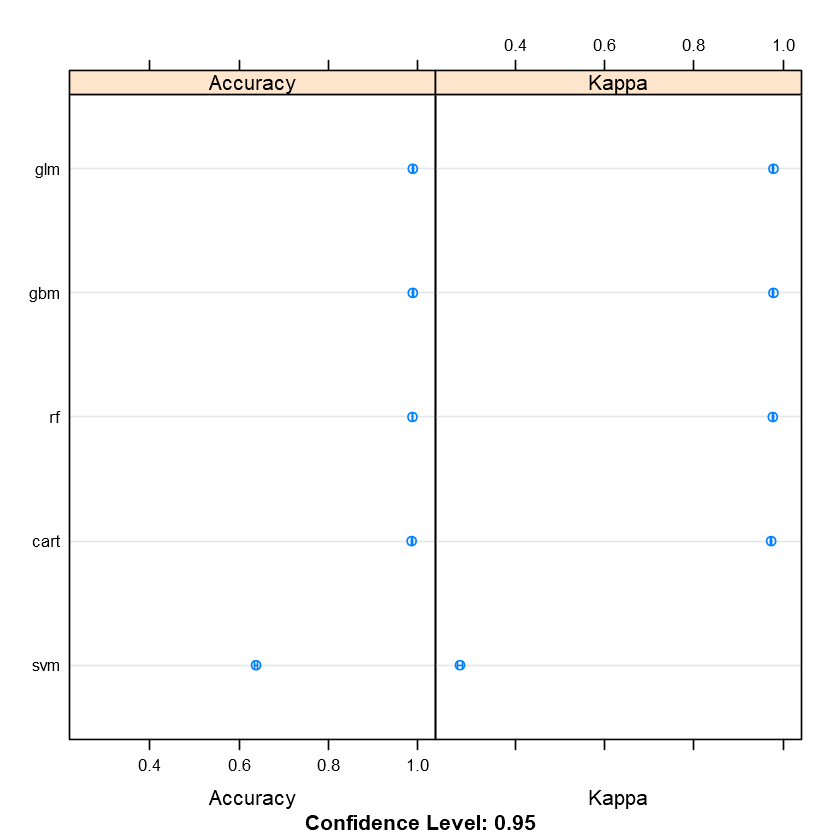

In [122]:
dotplot(results)

## From the above graph we can completely eliminate svm for terrible performance.

In [169]:
df_target = data.frame(Test$applicant)

In [170]:
df_target$cart_pred = predictions_cart
df_target$svm_pred = predictions_svm
df_target$gbm_pred = predictions_gbm
df_target$glm_pred = predictions_glm
df_target$rf_pred = predictions_rf

In [171]:
tail(df_target)

,Test.applicant,cart_pred,svm_pred,gbm_pred,glm_pred,rf_pred
61435,1,1,0,1,1,1
61436,1,1,0,1,1,1
61437,1,1,1,1,1,1
61438,1,1,0,1,1,1
61439,1,1,1,1,1,1
61440,1,1,1,1,1,1


In [172]:
print("Results for cart")
p <- data.frame(Actual = df_target$Test.applicant , Prediction = df_target$cart_pred)
p <- table(p)
p

accuracy <- (p[1,1] + p[2,2])/sum(p)
cat("Accuracy for CRAT is =",accuracy,"\n")

precision <- (p[2,2]/(p[2,2] + p[1,2]))

cat("precision for CRAT is =",precision,"\n")
recall <- (p[2,2]/(p[2,2] + p[2,1]))

cat("recall for CRAT is =",recall,"\n")
f_score <- 2*((precision*recall)/(precision+recall))

cat("f_score for CRAT is =",f_score,"\n")
g_score <- sqrt(precision*recall)

cat("g_score for CRAT is =",g_score,"\n")


[1] "Results for cart"


      Prediction
Actual     0     1
     0 57840  1459
     1     0  2141

Accuracy for CRAT is = 0.9762533 
precision for CRAT is = 0.5947222 
recall for CRAT is = 1 
f_score for CRAT is = 0.7458631 
g_score for CRAT is = 0.7711824 


In [173]:
print("Results for gbm")
p <- data.frame(Actual = df_target$Test.applicant , Prediction = df_target$gbm_pred)
p <- table(p)
p

accuracy <- (p[1,1] + p[2,2])/sum(p)
cat("Accuracy for gbm is =",accuracy,"\n")

precision <- (p[2,2]/(p[2,2] + p[1,2]))

cat("precision for gbm is =",precision,"\n")
recall <- (p[2,2]/(p[2,2] + p[2,1]))

cat("recall for gbm is =",recall,"\n")
f_score <- 2*((precision*recall)/(precision+recall))

cat("f_score for gbm is =",f_score,"\n")
g_score <- sqrt(precision*recall)

cat("g_score for gbm is =",g_score,"\n")

[1] "Results for gbm"


      Prediction
Actual     0     1
     0 57840  1459
     1     0  2141

Accuracy for gbm is = 0.9762533 
precision for gbm is = 0.5947222 
recall for gbm is = 1 
f_score for gbm is = 0.7458631 
g_score for gbm is = 0.7711824 


In [174]:
print("Results for glm")
p <- data.frame(Actual = df_target$Test.applicant , Prediction = df_target$glm_pred)
p <- table(p)
p

accuracy <- (p[1,1] + p[2,2])/sum(p)
cat("Accuracy for glm is =",accuracy,"\n")

precision <- (p[2,2]/(p[2,2] + p[1,2]))

cat("precision for glm is =",precision,"\n")
recall <- (p[2,2]/(p[2,2] + p[2,1]))

cat("recall for glm is =",recall,"\n")
f_score <- 2*((precision*recall)/(precision+recall))

cat("f_score for glm is =",f_score,"\n")
g_score <- sqrt(precision*recall)

cat("g_score for glm is =",g_score,"\n")

[1] "Results for glm"


      Prediction
Actual     0     1
     0 57840  1459
     1     0  2141

Accuracy for glm is = 0.9762533 
precision for glm is = 0.5947222 
recall for glm is = 1 
f_score for glm is = 0.7458631 
g_score for glm is = 0.7711824 


In [175]:
print("Results for rf")
p <- data.frame(Actual = df_target$Test.applicant , Prediction = df_target$rf_pred)
p <- table(p)
p

accuracy <- (p[1,1] + p[2,2])/sum(p)
cat("Accuracy for glm is =",accuracy,"\n")

precision <- (p[2,2]/(p[2,2] + p[1,2]))

cat("precision for glm is =",precision,"\n")
recall <- (p[2,2]/(p[2,2] + p[2,1]))

cat("recall for glm is =",recall,"\n")
f_score <- 2*((precision*recall)/(precision+recall))

cat("f_score for glm is =",f_score,"\n")
g_score <- sqrt(precision*recall)

cat("g_score for glm is =",g_score,"\n")

[1] "Results for gbm"


      Prediction
Actual     0     1
     0 57869  1430
     1     5  2136

Accuracy for glm is = 0.9766439 
precision for glm is = 0.5989905 
recall for glm is = 0.9976646 
f_score for glm is = 0.7485544 
g_score for glm is = 0.7730405 


## 2. Create 90:10 split and validate those models using ratio of correct predictions vs total predictions.

In [17]:

## 70% of the sample size
smp_size <- floor(0.90 * nrow(new_DF1))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(new_DF1)), size = smp_size)

Train <- new_DF1[train_ind, ]
Test <- new_DF1[-train_ind, ]

row.names(Train) = NULL
row.names(Test)= NULL

In [18]:
# Proportion of class in the target
prop.table(table(Train$applicant))



         0          1 
0.96462649 0.03537351 

In [19]:
summary(Train)

    x.State        x.Gender                               x.Source    
 NY     :52122   Female:101677   NRCCUA-PurchaseNames         :55103  
 NJ     :45242   Male  : 82670   CollegeBoard-Senior_Search   :48604  
 CT     :31940                   CollegeBoard-Juniors_Search  :44370  
 MA     :17103                   CollegeBoard-Sophomore_Search:14318  
 MD     :15860                   ACT-Other                    : 7127  
 IL     :11800                   CollegeBoard-Other           : 6722  
 (Other):10280                   (Other)                      : 8103  
     x.GPA       x.DistancetoCampus_miles x.HouseholdIncome    x.InState 
 Min.   :2.000   Min.   :   0.052         Min.   : 2.004e+04   N:152407  
 1st Qu.:3.000   1st Qu.:  43.976         1st Qu.: 5.874e+04   Y: 31940  
 Median :3.064   Median :  64.035         Median : 8.919e+04             
 Mean   :3.095   Mean   : 146.177         Mean   :3.173e+143             
 3rd Qu.:3.127   3rd Qu.: 140.379         3rd Qu.: 1.161e+05  

### again the same imbalance issue with the data. We will use the same under sampling approach to tackle this problem 

In [23]:
# Under Sampling
set.seed(222)
under_sam= ovun.sample(applicant~.,data = Train, method = "under", N=6521*2)$data
table(under_sam$applicant)


   0    1 
6521 6521 

We got same instances for both the outcomes now

## Model 1:GLM

In [181]:
#glm model
set.seed(7)
fit.glm <- train(applicant~., data=under_sam, method="glm")

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.f

In [186]:
saveRDS(fit.glm, "C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\glm_model2.rds")

In [182]:
# estimate skill of glm on the validation dataset
predictions_glm <- predict(fit.glm, Test)
confusionMatrix(predictions_glm, Test$applicant, positive = "1")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 19260     3
         1   504   713
                                         
               Accuracy : 0.9752         
                 95% CI : (0.973, 0.9773)
    No Information Rate : 0.965          
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7256         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.99581        
            Specificity : 0.97450        
         Pos Pred Value : 0.58587        
         Neg Pred Value : 0.99984        
             Prevalence : 0.03496        
         Detection Rate : 0.03481        
   Detection Prevalence : 0.05942        
      Balanced Accuracy : 0.98515        
                                         
       'Positive' Class : 1              
                                      

## Model 2 : GBM

In [183]:
set.seed(7)
fit.gbm <- train(applicant~., data=under_sam, method="gbm")

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2048             nan     0.1000    0.0908
     2        1.0557             nan     0.1000    0.0743
     3        0.9320             nan     0.1000    0.0619
     4        0.8280             nan     0.1000    0.0522
     5        0.7389             nan     0.1000    0.0445
     6        0.6625             nan     0.1000    0.0382
     7        0.5964             nan     0.1000    0.0330
     8        0.5394             nan     0.1000    0.0287
     9        0.4892             nan     0.1000    0.0250
    10        0.4451             nan     0.1000    0.0220
    20        0.2107             nan     0.1000    0.0064
    40        0.1196             nan     0.1000    0.0007
    60        0.1079             nan     0.1000    0.0001
    80        0.1032             nan     0.1000    0.0000
   100        0.1006             nan     0.1000   -0.0000
   120        0.0986             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2040             nan     0.1000    0.0908
     2        1.0559             nan     0.1000    0.0742
     3        0.9321             nan     0.1000    0.0619
     4        0.8277             nan     0.1000    0.0522
     5        0.7383             nan     0.1000    0.0445
     6        0.6619             nan     0.1000    0.0382
     7        0.5958             nan     0.1000    0.0330
     8        0.5384             nan     0.1000    0.0287
     9        0.4881             nan     0.1000    0.0251
    10        0.4444             nan     0.1000    0.0220
    20        0.2085             nan     0.1000    0.0064
    40        0.1139             nan     0.1000    0.0006
    60        0.1000             nan     0.1000    0.0002
    80        0.0935             nan     0.1000    0.0001
   100        0.0896             nan     0.1000   -0.0000
   120        0.0864             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2047             nan     0.1000    0.0909
     2        1.0556             nan     0.1000    0.0743
     3        0.9314             nan     0.1000    0.0619
     4        0.8266             nan     0.1000    0.0522
     5        0.7374             nan     0.1000    0.0444
     6        0.6609             nan     0.1000    0.0382
     7        0.5949             nan     0.1000    0.0331
     8        0.5375             nan     0.1000    0.0287
     9        0.4873             nan     0.1000    0.0250
    10        0.4432             nan     0.1000    0.0219
    20        0.2068             nan     0.1000    0.0064
    40        0.1086             nan     0.1000    0.0007
    60        0.0931             nan     0.1000    0.0000
    80        0.0871             nan     0.1000    0.0000
   100        0.0811             nan     0.1000    0.0000
   120        0.0769             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2044             nan     0.1000    0.0908
     2        1.0561             nan     0.1000    0.0743
     3        0.9322             nan     0.1000    0.0619
     4        0.8279             nan     0.1000    0.0522
     5        0.7390             nan     0.1000    0.0446
     6        0.6628             nan     0.1000    0.0383
     7        0.5966             nan     0.1000    0.0331
     8        0.5388             nan     0.1000    0.0288
     9        0.4888             nan     0.1000    0.0251
    10        0.4449             nan     0.1000    0.0220
    20        0.2095             nan     0.1000    0.0064
    40        0.1189             nan     0.1000    0.0004
    60        0.1067             nan     0.1000    0.0002
    80        0.1019             nan     0.1000   -0.0000
   100        0.0985             nan     0.1000    0.0000
   120        0.0971             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2048             nan     0.1000    0.0908
     2        1.0557             nan     0.1000    0.0744
     3        0.9320             nan     0.1000    0.0619
     4        0.8274             nan     0.1000    0.0523
     5        0.7381             nan     0.1000    0.0445
     6        0.6616             nan     0.1000    0.0382
     7        0.5952             nan     0.1000    0.0331
     8        0.5376             nan     0.1000    0.0287
     9        0.4877             nan     0.1000    0.0251
    10        0.4437             nan     0.1000    0.0220
    20        0.2074             nan     0.1000    0.0064
    40        0.1120             nan     0.1000    0.0008
    60        0.0999             nan     0.1000    0.0000
    80        0.0943             nan     0.1000    0.0001
   100        0.0905             nan     0.1000   -0.0000
   120        0.0874             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2048             nan     0.1000    0.0908
     2        1.0556             nan     0.1000    0.0745
     3        0.9312             nan     0.1000    0.0619
     4        0.8267             nan     0.1000    0.0523
     5        0.7374             nan     0.1000    0.0445
     6        0.6612             nan     0.1000    0.0382
     7        0.5950             nan     0.1000    0.0332
     8        0.5377             nan     0.1000    0.0288
     9        0.4872             nan     0.1000    0.0251
    10        0.4430             nan     0.1000    0.0220
    20        0.2058             nan     0.1000    0.0065
    40        0.1072             nan     0.1000    0.0007
    60        0.0921             nan     0.1000   -0.0000
    80        0.0836             nan     0.1000    0.0001
   100        0.0783             nan     0.1000    0.0002
   120        0.0740             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 2: x.StateAR has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2054             nan     0.1000    0.0903
     2        1.0571             nan     0.1000    0.0739
     3        0.9338             nan     0.1000    0.0616
     4        0.8302             nan     0.1000    0.0520
     5        0.7416             nan     0.1000    0.0442
     6        0.6657             nan     0.1000    0.0380
     7        0.5998             nan     0.1000    0.0328
     8        0.5426             nan     0.1000    0.0285
     9        0.4929             nan     0.1000    0.0249
    10        0.4492             nan     0.1000    0.0218
    20        0.2171             nan     0.1000    0.0063
    40        0.1274             nan     0.1000    0.0007
    60        0.1148             nan     0.1000    0.0001
    80        0.1094             nan     0.1000    0.0000
   100        0.1054             nan     0.1000    0.0000
   120        0.1027             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 2: x.StateAR has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2055             nan     0.1000    0.0904
     2        1.0572             nan     0.1000    0.0740
     3        0.9340             nan     0.1000    0.0616
     4        0.8298             nan     0.1000    0.0520
     5        0.7417             nan     0.1000    0.0443
     6        0.6661             nan     0.1000    0.0381
     7        0.6002             nan     0.1000    0.0329
     8        0.5427             nan     0.1000    0.0286
     9        0.4923             nan     0.1000    0.0249
    10        0.4486             nan     0.1000    0.0218
    20        0.2147             nan     0.1000    0.0063
    40        0.1200             nan     0.1000    0.0007
    60        0.1062             nan     0.1000    0.0001
    80        0.0997             nan     0.1000   -0.0000
   100        0.0962             nan     0.1000   -0.0000
   120        0.0930             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 2: x.StateAR has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2055             nan     0.1000    0.0904
     2        1.0567             nan     0.1000    0.0741
     3        0.9337             nan     0.1000    0.0616
     4        0.8299             nan     0.1000    0.0520
     5        0.7414             nan     0.1000    0.0443
     6        0.6650             nan     0.1000    0.0381
     7        0.5989             nan     0.1000    0.0329
     8        0.5415             nan     0.1000    0.0286
     9        0.4918             nan     0.1000    0.0250
    10        0.4479             nan     0.1000    0.0219
    20        0.2125             nan     0.1000    0.0064
    40        0.1139             nan     0.1000    0.0006
    60        0.0977             nan     0.1000    0.0002
    80        0.0910             nan     0.1000    0.0000
   100        0.0859             nan     0.1000   -0.0001
   120        0.0811             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2067             nan     0.1000    0.0899
     2        1.0598             nan     0.1000    0.0736
     3        0.9374             nan     0.1000    0.0613
     4        0.8341             nan     0.1000    0.0517
     5        0.7456             nan     0.1000    0.0440
     6        0.6703             nan     0.1000    0.0378
     7        0.6046             nan     0.1000    0.0326
     8        0.5481             nan     0.1000    0.0283
     9        0.4986             nan     0.1000    0.0247
    10        0.4554             nan     0.1000    0.0216
    20        0.2263             nan     0.1000    0.0063
    40        0.1376             nan     0.1000    0.0007
    60        0.1240             nan     0.1000    0.0002
    80        0.1177             nan     0.1000    0.0000
   100        0.1141             nan     0.1000   -0.0000
   120        0.1117             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2066             nan     0.1000    0.0899
     2        1.0594             nan     0.1000    0.0737
     3        0.9372             nan     0.1000    0.0613
     4        0.8338             nan     0.1000    0.0517
     5        0.7455             nan     0.1000    0.0442
     6        0.6699             nan     0.1000    0.0378
     7        0.6047             nan     0.1000    0.0328
     8        0.5479             nan     0.1000    0.0284
     9        0.4983             nan     0.1000    0.0248
    10        0.4549             nan     0.1000    0.0217
    20        0.2222             nan     0.1000    0.0063
    40        0.1291             nan     0.1000    0.0005
    60        0.1140             nan     0.1000    0.0002
    80        0.1067             nan     0.1000   -0.0001
   100        0.1022             nan     0.1000   -0.0000
   120        0.0974             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2066             nan     0.1000    0.0900
     2        1.0590             nan     0.1000    0.0736
     3        0.9357             nan     0.1000    0.0613
     4        0.8320             nan     0.1000    0.0516
     5        0.7442             nan     0.1000    0.0440
     6        0.6686             nan     0.1000    0.0379
     7        0.6031             nan     0.1000    0.0327
     8        0.5465             nan     0.1000    0.0284
     9        0.4970             nan     0.1000    0.0247
    10        0.4537             nan     0.1000    0.0218
    20        0.2195             nan     0.1000    0.0063
    40        0.1214             nan     0.1000    0.0006
    60        0.1046             nan     0.1000    0.0000
    80        0.0963             nan     0.1000    0.0000
   100        0.0915             nan     0.1000    0.0000
   120        0.0865             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2051             nan     0.1000    0.0906
     2        1.0564             nan     0.1000    0.0742
     3        0.9327             nan     0.1000    0.0618
     4        0.8283             nan     0.1000    0.0521
     5        0.7393             nan     0.1000    0.0444
     6        0.6629             nan     0.1000    0.0381
     7        0.5971             nan     0.1000    0.0329
     8        0.5400             nan     0.1000    0.0286
     9        0.4904             nan     0.1000    0.0250
    10        0.4465             nan     0.1000    0.0219
    20        0.2131             nan     0.1000    0.0064
    40        0.1229             nan     0.1000    0.0004
    60        0.1104             nan     0.1000    0.0001
    80        0.1045             nan     0.1000    0.0000
   100        0.1011             nan     0.1000    0.0001
   120        0.0983             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2050             nan     0.1000    0.0907
     2        1.0566             nan     0.1000    0.0743
     3        0.9329             nan     0.1000    0.0618
     4        0.8285             nan     0.1000    0.0522
     5        0.7395             nan     0.1000    0.0445
     6        0.6630             nan     0.1000    0.0382
     7        0.5971             nan     0.1000    0.0330
     8        0.5396             nan     0.1000    0.0287
     9        0.4897             nan     0.1000    0.0250
    10        0.4460             nan     0.1000    0.0219
    20        0.2108             nan     0.1000    0.0064
    40        0.1154             nan     0.1000    0.0005
    60        0.1009             nan     0.1000   -0.0000
    80        0.0943             nan     0.1000   -0.0000
   100        0.0904             nan     0.1000   -0.0000
   120        0.0876             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2048             nan     0.1000    0.0907
     2        1.0566             nan     0.1000    0.0744
     3        0.9325             nan     0.1000    0.0619
     4        0.8280             nan     0.1000    0.0522
     5        0.7391             nan     0.1000    0.0444
     6        0.6626             nan     0.1000    0.0382
     7        0.5965             nan     0.1000    0.0331
     8        0.5389             nan     0.1000    0.0288
     9        0.4887             nan     0.1000    0.0251
    10        0.4448             nan     0.1000    0.0220
    20        0.2079             nan     0.1000    0.0065
    40        0.1097             nan     0.1000    0.0005
    60        0.0932             nan     0.1000    0.0004
    80        0.0865             nan     0.1000    0.0000
   100        0.0808             nan     0.1000    0.0000
   120        0.0758             nan     0.1000    0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2049             nan     0.1000    0.0907
     2        1.0563             nan     0.1000    0.0743
     3        0.9323             nan     0.1000    0.0617
     4        0.8284             nan     0.1000    0.0521
     5        0.7396             nan     0.1000    0.0444
     6        0.6633             nan     0.1000    0.0381
     7        0.5973             nan     0.1000    0.0330
     8        0.5402             nan     0.1000    0.0287
     9        0.4902             nan     0.1000    0.0250
    10        0.4461             nan     0.1000    0.0219
    20        0.2119             nan     0.1000    0.0063
    40        0.1216             nan     0.1000    0.0007
    60        0.1094             nan     0.1000    0.0002
    80        0.1031             nan     0.1000    0.0001
   100        0.0994             nan     0.1000   -0.0000
   120        0.0969             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2045             nan     0.1000    0.0907
     2        1.0562             nan     0.1000    0.0743
     3        0.9328             nan     0.1000    0.0617
     4        0.8287             nan     0.1000    0.0522
     5        0.7396             nan     0.1000    0.0445
     6        0.6633             nan     0.1000    0.0382
     7        0.5975             nan     0.1000    0.0331
     8        0.5400             nan     0.1000    0.0287
     9        0.4898             nan     0.1000    0.0251
    10        0.4460             nan     0.1000    0.0220
    20        0.2101             nan     0.1000    0.0064
    40        0.1139             nan     0.1000    0.0007
    60        0.0998             nan     0.1000    0.0000
    80        0.0921             nan     0.1000   -0.0000
   100        0.0875             nan     0.1000    0.0000
   120        0.0844             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2050             nan     0.1000    0.0909
     2        1.0561             nan     0.1000    0.0744
     3        0.9323             nan     0.1000    0.0620
     4        0.8282             nan     0.1000    0.0523
     5        0.7384             nan     0.1000    0.0446
     6        0.6621             nan     0.1000    0.0382
     7        0.5956             nan     0.1000    0.0331
     8        0.5382             nan     0.1000    0.0288
     9        0.4882             nan     0.1000    0.0252
    10        0.4438             nan     0.1000    0.0220
    20        0.2066             nan     0.1000    0.0064
    40        0.1077             nan     0.1000    0.0007
    60        0.0901             nan     0.1000    0.0001
    80        0.0825             nan     0.1000    0.0000
   100        0.0776             nan     0.1000   -0.0000
   120        0.0728             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2054             nan     0.1000    0.0901
     2        1.0580             nan     0.1000    0.0737
     3        0.9356             nan     0.1000    0.0614
     4        0.8320             nan     0.1000    0.0518
     5        0.7434             nan     0.1000    0.0441
     6        0.6674             nan     0.1000    0.0379
     7        0.6020             nan     0.1000    0.0327
     8        0.5454             nan     0.1000    0.0284
     9        0.4960             nan     0.1000    0.0248
    10        0.4524             nan     0.1000    0.0217
    20        0.2210             nan     0.1000    0.0063
    40        0.1327             nan     0.1000    0.0008
    60        0.1196             nan     0.1000    0.0001
    80        0.1146             nan     0.1000   -0.0000
   100        0.1113             nan     0.1000    0.0000
   120        0.1096             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2060             nan     0.1000    0.0901
     2        1.0583             nan     0.1000    0.0738
     3        0.9349             nan     0.1000    0.0615
     4        0.8312             nan     0.1000    0.0518
     5        0.7432             nan     0.1000    0.0442
     6        0.6675             nan     0.1000    0.0380
     7        0.6018             nan     0.1000    0.0328
     8        0.5450             nan     0.1000    0.0285
     9        0.4952             nan     0.1000    0.0249
    10        0.4517             nan     0.1000    0.0217
    20        0.2187             nan     0.1000    0.0063
    40        0.1254             nan     0.1000    0.0006
    60        0.1116             nan     0.1000    0.0002
    80        0.1061             nan     0.1000   -0.0000
   100        0.1006             nan     0.1000    0.0000
   120        0.0977             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2062             nan     0.1000    0.0902
     2        1.0582             nan     0.1000    0.0740
     3        0.9350             nan     0.1000    0.0615
     4        0.8315             nan     0.1000    0.0518
     5        0.7428             nan     0.1000    0.0442
     6        0.6670             nan     0.1000    0.0381
     7        0.6013             nan     0.1000    0.0328
     8        0.5441             nan     0.1000    0.0285
     9        0.4941             nan     0.1000    0.0249
    10        0.4503             nan     0.1000    0.0219
    20        0.2159             nan     0.1000    0.0063
    40        0.1187             nan     0.1000    0.0006
    60        0.1026             nan     0.1000    0.0000
    80        0.0923             nan     0.1000   -0.0000
   100        0.0862             nan     0.1000   -0.0002
   120        0.0823             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2052             nan     0.1000    0.0904
     2        1.0575             nan     0.1000    0.0741
     3        0.9344             nan     0.1000    0.0617
     4        0.8305             nan     0.1000    0.0521
     5        0.7420             nan     0.1000    0.0444
     6        0.6657             nan     0.1000    0.0381
     7        0.5996             nan     0.1000    0.0329
     8        0.5424             nan     0.1000    0.0286
     9        0.4924             nan     0.1000    0.0249
    10        0.4485             nan     0.1000    0.0218
    20        0.2157             nan     0.1000    0.0063
    40        0.1262             nan     0.1000    0.0007
    60        0.1127             nan     0.1000   -0.0001
    80        0.1066             nan     0.1000    0.0002
   100        0.1028             nan     0.1000   -0.0000
   120        0.1000             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2050             nan     0.1000    0.0905
     2        1.0572             nan     0.1000    0.0741
     3        0.9342             nan     0.1000    0.0617
     4        0.8301             nan     0.1000    0.0521
     5        0.7417             nan     0.1000    0.0444
     6        0.6654             nan     0.1000    0.0381
     7        0.5993             nan     0.1000    0.0330
     8        0.5419             nan     0.1000    0.0287
     9        0.4920             nan     0.1000    0.0249
    10        0.4482             nan     0.1000    0.0219
    20        0.2133             nan     0.1000    0.0064
    40        0.1181             nan     0.1000    0.0008
    60        0.1039             nan     0.1000    0.0002
    80        0.0967             nan     0.1000    0.0000
   100        0.0923             nan     0.1000   -0.0000
   120        0.0893             nan     0.1000    0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2048             nan     0.1000    0.0906
     2        1.0564             nan     0.1000    0.0741
     3        0.9327             nan     0.1000    0.0616
     4        0.8286             nan     0.1000    0.0521
     5        0.7400             nan     0.1000    0.0443
     6        0.6639             nan     0.1000    0.0381
     7        0.5981             nan     0.1000    0.0329
     8        0.5406             nan     0.1000    0.0286
     9        0.4907             nan     0.1000    0.0251
    10        0.4466             nan     0.1000    0.0219
    20        0.2112             nan     0.1000    0.0065
    40        0.1116             nan     0.1000    0.0003
    60        0.0969             nan     0.1000    0.0000
    80        0.0902             nan     0.1000   -0.0000
   100        0.0840             nan     0.1000   -0.0000
   120        0.0790             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2047             nan     0.1000    0.0907
     2        1.0565             nan     0.1000    0.0743
     3        0.9329             nan     0.1000    0.0619
     4        0.8287             nan     0.1000    0.0522
     5        0.7396             nan     0.1000    0.0445
     6        0.6635             nan     0.1000    0.0382
     7        0.5977             nan     0.1000    0.0331
     8        0.5402             nan     0.1000    0.0287
     9        0.4900             nan     0.1000    0.0250
    10        0.4463             nan     0.1000    0.0219
    20        0.2121             nan     0.1000    0.0064
    40        0.1212             nan     0.1000    0.0007
    60        0.1090             nan     0.1000    0.0001
    80        0.1036             nan     0.1000    0.0000
   100        0.1001             nan     0.1000   -0.0000
   120        0.0980             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2044             nan     0.1000    0.0907
     2        1.0561             nan     0.1000    0.0743
     3        0.9323             nan     0.1000    0.0618
     4        0.8281             nan     0.1000    0.0522
     5        0.7391             nan     0.1000    0.0445
     6        0.6625             nan     0.1000    0.0382
     7        0.5964             nan     0.1000    0.0330
     8        0.5392             nan     0.1000    0.0286
     9        0.4890             nan     0.1000    0.0250
    10        0.4453             nan     0.1000    0.0220
    20        0.2095             nan     0.1000    0.0064
    40        0.1146             nan     0.1000    0.0005
    60        0.1012             nan     0.1000    0.0002
    80        0.0932             nan     0.1000    0.0001
   100        0.0881             nan     0.1000    0.0001
   120        0.0850             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2047             nan     0.1000    0.0908
     2        1.0563             nan     0.1000    0.0742
     3        0.9325             nan     0.1000    0.0619
     4        0.8275             nan     0.1000    0.0523
     5        0.7383             nan     0.1000    0.0445
     6        0.6618             nan     0.1000    0.0382
     7        0.5956             nan     0.1000    0.0330
     8        0.5384             nan     0.1000    0.0287
     9        0.4881             nan     0.1000    0.0250
    10        0.4439             nan     0.1000    0.0220
    20        0.2082             nan     0.1000    0.0065
    40        0.1087             nan     0.1000    0.0007
    60        0.0929             nan     0.1000    0.0000
    80        0.0856             nan     0.1000   -0.0001
   100        0.0801             nan     0.1000    0.0001
   120        0.0761             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2052             nan     0.1000    0.0905
     2        1.0567             nan     0.1000    0.0741
     3        0.9331             nan     0.1000    0.0617
     4        0.8296             nan     0.1000    0.0521
     5        0.7406             nan     0.1000    0.0444
     6        0.6643             nan     0.1000    0.0381
     7        0.5984             nan     0.1000    0.0329
     8        0.5408             nan     0.1000    0.0286
     9        0.4913             nan     0.1000    0.0250
    10        0.4476             nan     0.1000    0.0218
    20        0.2138             nan     0.1000    0.0063
    40        0.1241             nan     0.1000    0.0004
    60        0.1108             nan     0.1000    0.0003
    80        0.1046             nan     0.1000    0.0000
   100        0.1007             nan     0.1000    0.0001
   120        0.0981             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2052             nan     0.1000    0.0906
     2        1.0564             nan     0.1000    0.0741
     3        0.9331             nan     0.1000    0.0618
     4        0.8290             nan     0.1000    0.0521
     5        0.7404             nan     0.1000    0.0445
     6        0.6645             nan     0.1000    0.0382
     7        0.5988             nan     0.1000    0.0330
     8        0.5414             nan     0.1000    0.0288
     9        0.4913             nan     0.1000    0.0251
    10        0.4470             nan     0.1000    0.0219
    20        0.2121             nan     0.1000    0.0064
    40        0.1159             nan     0.1000    0.0007
    60        0.1016             nan     0.1000   -0.0000
    80        0.0944             nan     0.1000    0.0000
   100        0.0897             nan     0.1000   -0.0000
   120        0.0858             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2049             nan     0.1000    0.0906
     2        1.0562             nan     0.1000    0.0742
     3        0.9330             nan     0.1000    0.0618
     4        0.8285             nan     0.1000    0.0521
     5        0.7396             nan     0.1000    0.0444
     6        0.6635             nan     0.1000    0.0381
     7        0.5977             nan     0.1000    0.0331
     8        0.5406             nan     0.1000    0.0287
     9        0.4903             nan     0.1000    0.0251
    10        0.4461             nan     0.1000    0.0219
    20        0.2099             nan     0.1000    0.0065
    40        0.1108             nan     0.1000    0.0007
    60        0.0934             nan     0.1000    0.0000
    80        0.0853             nan     0.1000    0.0001
   100        0.0805             nan     0.1000    0.0001
   120        0.0754             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2064             nan     0.1000    0.0902
     2        1.0585             nan     0.1000    0.0739
     3        0.9355             nan     0.1000    0.0615
     4        0.8321             nan     0.1000    0.0519
     5        0.7434             nan     0.1000    0.0442
     6        0.6673             nan     0.1000    0.0379
     7        0.6019             nan     0.1000    0.0328
     8        0.5448             nan     0.1000    0.0285
     9        0.4952             nan     0.1000    0.0249
    10        0.4519             nan     0.1000    0.0218
    20        0.2202             nan     0.1000    0.0063
    40        0.1312             nan     0.1000    0.0008
    60        0.1176             nan     0.1000    0.0001
    80        0.1108             nan     0.1000    0.0001
   100        0.1066             nan     0.1000   -0.0001
   120        0.1037             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2059             nan     0.1000    0.0902
     2        1.0577             nan     0.1000    0.0738
     3        0.9347             nan     0.1000    0.0615
     4        0.8310             nan     0.1000    0.0519
     5        0.7424             nan     0.1000    0.0441
     6        0.6668             nan     0.1000    0.0380
     7        0.6012             nan     0.1000    0.0329
     8        0.5445             nan     0.1000    0.0285
     9        0.4949             nan     0.1000    0.0249
    10        0.4509             nan     0.1000    0.0218
    20        0.2176             nan     0.1000    0.0064
    40        0.1223             nan     0.1000    0.0005
    60        0.1070             nan     0.1000    0.0002
    80        0.1003             nan     0.1000   -0.0000
   100        0.0936             nan     0.1000    0.0001
   120        0.0888             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2056             nan     0.1000    0.0903
     2        1.0573             nan     0.1000    0.0739
     3        0.9338             nan     0.1000    0.0617
     4        0.8298             nan     0.1000    0.0519
     5        0.7413             nan     0.1000    0.0442
     6        0.6655             nan     0.1000    0.0380
     7        0.5997             nan     0.1000    0.0329
     8        0.5426             nan     0.1000    0.0286
     9        0.4928             nan     0.1000    0.0249
    10        0.4487             nan     0.1000    0.0218
    20        0.2138             nan     0.1000    0.0064
    40        0.1138             nan     0.1000    0.0007
    60        0.0956             nan     0.1000    0.0001
    80        0.0882             nan     0.1000   -0.0000
   100        0.0817             nan     0.1000   -0.0000
   120        0.0758             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2048             nan     0.1000    0.0906
     2        1.0566             nan     0.1000    0.0741
     3        0.9330             nan     0.1000    0.0617
     4        0.8291             nan     0.1000    0.0521
     5        0.7399             nan     0.1000    0.0444
     6        0.6640             nan     0.1000    0.0381
     7        0.5981             nan     0.1000    0.0330
     8        0.5408             nan     0.1000    0.0287
     9        0.4909             nan     0.1000    0.0250
    10        0.4469             nan     0.1000    0.0218
    20        0.2145             nan     0.1000    0.0064
    40        0.1233             nan     0.1000    0.0005
    60        0.1102             nan     0.1000    0.0003
    80        0.1041             nan     0.1000    0.0001
   100        0.1005             nan     0.1000    0.0000
   120        0.0986             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2049             nan     0.1000    0.0906
     2        1.0563             nan     0.1000    0.0741
     3        0.9330             nan     0.1000    0.0618
     4        0.8286             nan     0.1000    0.0521
     5        0.7400             nan     0.1000    0.0444
     6        0.6635             nan     0.1000    0.0381
     7        0.5975             nan     0.1000    0.0330
     8        0.5400             nan     0.1000    0.0287
     9        0.4898             nan     0.1000    0.0250
    10        0.4459             nan     0.1000    0.0219
    20        0.2108             nan     0.1000    0.0064
    40        0.1163             nan     0.1000    0.0005
    60        0.1014             nan     0.1000    0.0000
    80        0.0951             nan     0.1000    0.0000
   100        0.0900             nan     0.1000   -0.0000
   120        0.0863             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2046             nan     0.1000    0.0905
     2        1.0565             nan     0.1000    0.0742
     3        0.9332             nan     0.1000    0.0618
     4        0.8285             nan     0.1000    0.0522
     5        0.7397             nan     0.1000    0.0445
     6        0.6633             nan     0.1000    0.0381
     7        0.5970             nan     0.1000    0.0330
     8        0.5393             nan     0.1000    0.0287
     9        0.4889             nan     0.1000    0.0250
    10        0.4452             nan     0.1000    0.0219
    20        0.2088             nan     0.1000    0.0065
    40        0.1100             nan     0.1000    0.0008
    60        0.0932             nan     0.1000    0.0001
    80        0.0848             nan     0.1000   -0.0001
   100        0.0784             nan     0.1000    0.0001
   120        0.0740             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 25: x.StateMS has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2049             nan     0.1000    0.0905
     2        1.0564             nan     0.1000    0.0740
     3        0.9332             nan     0.1000    0.0616
     4        0.8292             nan     0.1000    0.0519
     5        0.7405             nan     0.1000    0.0442
     6        0.6647             nan     0.1000    0.0380
     7        0.5987             nan     0.1000    0.0328
     8        0.5414             nan     0.1000    0.0285
     9        0.4915             nan     0.1000    0.0248
    10        0.4482             nan     0.1000    0.0217
    20        0.2164             nan     0.1000    0.0063
    40        0.1263             nan     0.1000    0.0007
    60        0.1149             nan     0.1000    0.0003
    80        0.1097             nan     0.1000   -0.0000
   100        0.1064             nan     0.1000    0.0000
   120        0.1037             nan     0.1000    0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 25: x.StateMS has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2052             nan     0.1000    0.0904
     2        1.0566             nan     0.1000    0.0741
     3        0.9331             nan     0.1000    0.0616
     4        0.8292             nan     0.1000    0.0520
     5        0.7408             nan     0.1000    0.0444
     6        0.6645             nan     0.1000    0.0381
     7        0.5986             nan     0.1000    0.0329
     8        0.5414             nan     0.1000    0.0286
     9        0.4914             nan     0.1000    0.0249
    10        0.4475             nan     0.1000    0.0218
    20        0.2143             nan     0.1000    0.0064
    40        0.1196             nan     0.1000    0.0006
    60        0.1047             nan     0.1000    0.0001
    80        0.0973             nan     0.1000    0.0001
   100        0.0934             nan     0.1000   -0.0000
   120        0.0898             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 25: x.StateMS has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2047             nan     0.1000    0.0905
     2        1.0566             nan     0.1000    0.0741
     3        0.9333             nan     0.1000    0.0617
     4        0.8289             nan     0.1000    0.0520
     5        0.7404             nan     0.1000    0.0443
     6        0.6642             nan     0.1000    0.0381
     7        0.5983             nan     0.1000    0.0329
     8        0.5412             nan     0.1000    0.0286
     9        0.4913             nan     0.1000    0.0249
    10        0.4474             nan     0.1000    0.0219
    20        0.2125             nan     0.1000    0.0065
    40        0.1138             nan     0.1000    0.0008
    60        0.0977             nan     0.1000    0.0000
    80        0.0914             nan     0.1000   -0.0001
   100        0.0858             nan     0.1000    0.0000
   120        0.0821             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2054             nan     0.1000    0.0905
     2        1.0574             nan     0.1000    0.0742
     3        0.9336             nan     0.1000    0.0618
     4        0.8290             nan     0.1000    0.0520
     5        0.7405             nan     0.1000    0.0444
     6        0.6644             nan     0.1000    0.0381
     7        0.5985             nan     0.1000    0.0329
     8        0.5412             nan     0.1000    0.0286
     9        0.4913             nan     0.1000    0.0249
    10        0.4474             nan     0.1000    0.0218
    20        0.2141             nan     0.1000    0.0063
    40        0.1248             nan     0.1000    0.0004
    60        0.1109             nan     0.1000    0.0000
    80        0.1055             nan     0.1000   -0.0000
   100        0.1022             nan     0.1000   -0.0001
   120        0.1002             nan     0.1000    0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2053             nan     0.1000    0.0906
     2        1.0571             nan     0.1000    0.0741
     3        0.9333             nan     0.1000    0.0617
     4        0.8290             nan     0.1000    0.0521
     5        0.7398             nan     0.1000    0.0444
     6        0.6634             nan     0.1000    0.0381
     7        0.5975             nan     0.1000    0.0330
     8        0.5400             nan     0.1000    0.0286
     9        0.4898             nan     0.1000    0.0249
    10        0.4459             nan     0.1000    0.0218
    20        0.2116             nan     0.1000    0.0064
    40        0.1174             nan     0.1000    0.0005
    60        0.1034             nan     0.1000    0.0000
    80        0.0959             nan     0.1000   -0.0001
   100        0.0916             nan     0.1000    0.0001
   120        0.0875             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2052             nan     0.1000    0.0906
     2        1.0573             nan     0.1000    0.0742
     3        0.9336             nan     0.1000    0.0618
     4        0.8294             nan     0.1000    0.0521
     5        0.7405             nan     0.1000    0.0445
     6        0.6643             nan     0.1000    0.0383
     7        0.5981             nan     0.1000    0.0330
     8        0.5405             nan     0.1000    0.0287
     9        0.4904             nan     0.1000    0.0251
    10        0.4466             nan     0.1000    0.0220
    20        0.2107             nan     0.1000    0.0065
    40        0.1112             nan     0.1000    0.0006
    60        0.0941             nan     0.1000    0.0001
    80        0.0877             nan     0.1000   -0.0000
   100        0.0826             nan     0.1000   -0.0000
   120        0.0784             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2056             nan     0.1000    0.0904
     2        1.0575             nan     0.1000    0.0739
     3        0.9341             nan     0.1000    0.0616
     4        0.8302             nan     0.1000    0.0519
     5        0.7418             nan     0.1000    0.0443
     6        0.6662             nan     0.1000    0.0381
     7        0.6006             nan     0.1000    0.0329
     8        0.5438             nan     0.1000    0.0286
     9        0.4939             nan     0.1000    0.0249
    10        0.4499             nan     0.1000    0.0218
    20        0.2175             nan     0.1000    0.0063
    40        0.1283             nan     0.1000    0.0008
    60        0.1153             nan     0.1000    0.0001
    80        0.1083             nan     0.1000   -0.0000
   100        0.1043             nan     0.1000    0.0000
   120        0.1019             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2051             nan     0.1000    0.0904
     2        1.0571             nan     0.1000    0.0741
     3        0.9338             nan     0.1000    0.0616
     4        0.8298             nan     0.1000    0.0520
     5        0.7415             nan     0.1000    0.0443
     6        0.6655             nan     0.1000    0.0380
     7        0.5999             nan     0.1000    0.0329
     8        0.5428             nan     0.1000    0.0286
     9        0.4927             nan     0.1000    0.0249
    10        0.4488             nan     0.1000    0.0219
    20        0.2148             nan     0.1000    0.0064
    40        0.1198             nan     0.1000    0.0006
    60        0.1043             nan     0.1000    0.0003
    80        0.0975             nan     0.1000    0.0001
   100        0.0915             nan     0.1000    0.0001
   120        0.0878             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 17: x.StateKY has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2051             nan     0.1000    0.0905
     2        1.0573             nan     0.1000    0.0740
     3        0.9338             nan     0.1000    0.0616
     4        0.8299             nan     0.1000    0.0520
     5        0.7414             nan     0.1000    0.0443
     6        0.6651             nan     0.1000    0.0381
     7        0.5996             nan     0.1000    0.0329
     8        0.5422             nan     0.1000    0.0287
     9        0.4923             nan     0.1000    0.0250
    10        0.4489             nan     0.1000    0.0219
    20        0.2123             nan     0.1000    0.0065
    40        0.1130             nan     0.1000    0.0005
    60        0.0959             nan     0.1000    0.0001
    80        0.0882             nan     0.1000    0.0001
   100        0.0816             nan     0.1000    0.0001
   120        0.0768             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2067             nan     0.1000    0.0903
     2        1.0586             nan     0.1000    0.0739
     3        0.9358             nan     0.1000    0.0616
     4        0.8321             nan     0.1000    0.0519
     5        0.7441             nan     0.1000    0.0442
     6        0.6680             nan     0.1000    0.0380
     7        0.6024             nan     0.1000    0.0328
     8        0.5450             nan     0.1000    0.0285
     9        0.4953             nan     0.1000    0.0249
    10        0.4519             nan     0.1000    0.0218
    20        0.2199             nan     0.1000    0.0063
    40        0.1313             nan     0.1000    0.0004
    60        0.1183             nan     0.1000    0.0001
    80        0.1138             nan     0.1000   -0.0000
   100        0.1103             nan     0.1000    0.0001
   120        0.1085             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2058             nan     0.1000    0.0902
     2        1.0583             nan     0.1000    0.0739
     3        0.9352             nan     0.1000    0.0615
     4        0.8313             nan     0.1000    0.0519
     5        0.7429             nan     0.1000    0.0442
     6        0.6668             nan     0.1000    0.0380
     7        0.6009             nan     0.1000    0.0329
     8        0.5439             nan     0.1000    0.0285
     9        0.4944             nan     0.1000    0.0248
    10        0.4507             nan     0.1000    0.0218
    20        0.2181             nan     0.1000    0.0064
    40        0.1239             nan     0.1000    0.0006
    60        0.1099             nan     0.1000    0.0000
    80        0.1011             nan     0.1000   -0.0000
   100        0.0969             nan     0.1000   -0.0000
   120        0.0931             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2052             nan     0.1000    0.0902
     2        1.0577             nan     0.1000    0.0739
     3        0.9346             nan     0.1000    0.0616
     4        0.8307             nan     0.1000    0.0519
     5        0.7421             nan     0.1000    0.0443
     6        0.6659             nan     0.1000    0.0380
     7        0.6004             nan     0.1000    0.0328
     8        0.5433             nan     0.1000    0.0285
     9        0.4935             nan     0.1000    0.0249
    10        0.4499             nan     0.1000    0.0218
    20        0.2157             nan     0.1000    0.0065
    40        0.1179             nan     0.1000    0.0007
    60        0.1020             nan     0.1000    0.0000
    80        0.0941             nan     0.1000    0.0001
   100        0.0884             nan     0.1000   -0.0000
   120        0.0844             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2048             nan     0.1000    0.0907
     2        1.0562             nan     0.1000    0.0742
     3        0.9325             nan     0.1000    0.0618
     4        0.8281             nan     0.1000    0.0522
     5        0.7394             nan     0.1000    0.0445
     6        0.6628             nan     0.1000    0.0382
     7        0.5969             nan     0.1000    0.0330
     8        0.5394             nan     0.1000    0.0286
     9        0.4895             nan     0.1000    0.0250
    10        0.4460             nan     0.1000    0.0219
    20        0.2116             nan     0.1000    0.0064
    40        0.1208             nan     0.1000    0.0007
    60        0.1085             nan     0.1000    0.0001
    80        0.1022             nan     0.1000   -0.0000
   100        0.0985             nan     0.1000    0.0000
   120        0.0965             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2048             nan     0.1000    0.0907
     2        1.0563             nan     0.1000    0.0742
     3        0.9330             nan     0.1000    0.0619
     4        0.8287             nan     0.1000    0.0522
     5        0.7392             nan     0.1000    0.0445
     6        0.6626             nan     0.1000    0.0382
     7        0.5962             nan     0.1000    0.0331
     8        0.5392             nan     0.1000    0.0287
     9        0.4895             nan     0.1000    0.0251
    10        0.4456             nan     0.1000    0.0220
    20        0.2096             nan     0.1000    0.0064
    40        0.1130             nan     0.1000    0.0007
    60        0.0989             nan     0.1000    0.0000
    80        0.0917             nan     0.1000    0.0001
   100        0.0874             nan     0.1000    0.0000
   120        0.0842             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2045             nan     0.1000    0.0908
     2        1.0562             nan     0.1000    0.0743
     3        0.9320             nan     0.1000    0.0619
     4        0.8279             nan     0.1000    0.0523
     5        0.7390             nan     0.1000    0.0445
     6        0.6622             nan     0.1000    0.0383
     7        0.5962             nan     0.1000    0.0331
     8        0.5389             nan     0.1000    0.0288
     9        0.4885             nan     0.1000    0.0251
    10        0.4448             nan     0.1000    0.0220
    20        0.2068             nan     0.1000    0.0064
    40        0.1075             nan     0.1000    0.0005
    60        0.0910             nan     0.1000   -0.0000
    80        0.0850             nan     0.1000   -0.0000
   100        0.0790             nan     0.1000    0.0000
   120        0.0738             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 24: x.StateMO has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2064             nan     0.1000    0.0899
     2        1.0590             nan     0.1000    0.0737
     3        0.9367             nan     0.1000    0.0614
     4        0.8334             nan     0.1000    0.0518
     5        0.7451             nan     0.1000    0.0441
     6        0.6693             nan     0.1000    0.0378
     7        0.6039             nan     0.1000    0.0327
     8        0.5475             nan     0.1000    0.0284
     9        0.4977             nan     0.1000    0.0248
    10        0.4545             nan     0.1000    0.0217
    20        0.2235             nan     0.1000    0.0063
    40        0.1359             nan     0.1000    0.0004
    60        0.1222             nan     0.1000    0.0003
    80        0.1164             nan     0.1000    0.0002
   100        0.1129             nan     0.1000   -0.0000
   120        0.1106             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 24: x.StateMO has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2059             nan     0.1000    0.0900
     2        1.0584             nan     0.1000    0.0736
     3        0.9363             nan     0.1000    0.0613
     4        0.8327             nan     0.1000    0.0518
     5        0.7444             nan     0.1000    0.0442
     6        0.6686             nan     0.1000    0.0378
     7        0.6031             nan     0.1000    0.0327
     8        0.5463             nan     0.1000    0.0284
     9        0.4968             nan     0.1000    0.0248
    10        0.4533             nan     0.1000    0.0217
    20        0.2215             nan     0.1000    0.0062
    40        0.1276             nan     0.1000    0.0007
    60        0.1126             nan     0.1000    0.0001
    80        0.1055             nan     0.1000    0.0000
   100        0.1010             nan     0.1000   -0.0001
   120        0.0957             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 24: x.StateMO has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2062             nan     0.1000    0.0900
     2        1.0588             nan     0.1000    0.0736
     3        0.9358             nan     0.1000    0.0615
     4        0.8322             nan     0.1000    0.0518
     5        0.7438             nan     0.1000    0.0442
     6        0.6678             nan     0.1000    0.0380
     7        0.6025             nan     0.1000    0.0328
     8        0.5451             nan     0.1000    0.0285
     9        0.4953             nan     0.1000    0.0248
    10        0.4515             nan     0.1000    0.0217
    20        0.2183             nan     0.1000    0.0064
    40        0.1200             nan     0.1000    0.0006
    60        0.1036             nan     0.1000    0.0001
    80        0.0963             nan     0.1000    0.0001
   100        0.0906             nan     0.1000    0.0000
   120        0.0840             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2048             nan     0.1000    0.0905
     2        1.0567             nan     0.1000    0.0741
     3        0.9334             nan     0.1000    0.0617
     4        0.8293             nan     0.1000    0.0520
     5        0.7405             nan     0.1000    0.0443
     6        0.6643             nan     0.1000    0.0381
     7        0.5982             nan     0.1000    0.0329
     8        0.5414             nan     0.1000    0.0286
     9        0.4917             nan     0.1000    0.0249
    10        0.4479             nan     0.1000    0.0219
    20        0.2151             nan     0.1000    0.0064
    40        0.1249             nan     0.1000    0.0004
    60        0.1118             nan     0.1000    0.0001
    80        0.1061             nan     0.1000    0.0001
   100        0.1030             nan     0.1000    0.0000
   120        0.1010             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2045             nan     0.1000    0.0905
     2        1.0558             nan     0.1000    0.0741
     3        0.9330             nan     0.1000    0.0616
     4        0.8293             nan     0.1000    0.0521
     5        0.7404             nan     0.1000    0.0443
     6        0.6639             nan     0.1000    0.0382
     7        0.5980             nan     0.1000    0.0330
     8        0.5409             nan     0.1000    0.0286
     9        0.4911             nan     0.1000    0.0250
    10        0.4472             nan     0.1000    0.0219
    20        0.2126             nan     0.1000    0.0064
    40        0.1169             nan     0.1000    0.0007
    60        0.1026             nan     0.1000    0.0001
    80        0.0974             nan     0.1000    0.0001
   100        0.0919             nan     0.1000   -0.0002
   120        0.0890             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2049             nan     0.1000    0.0907
     2        1.0565             nan     0.1000    0.0742
     3        0.9329             nan     0.1000    0.0618
     4        0.8286             nan     0.1000    0.0522
     5        0.7397             nan     0.1000    0.0444
     6        0.6634             nan     0.1000    0.0382
     7        0.5970             nan     0.1000    0.0330
     8        0.5396             nan     0.1000    0.0287
     9        0.4894             nan     0.1000    0.0250
    10        0.4456             nan     0.1000    0.0219
    20        0.2096             nan     0.1000    0.0064
    40        0.1109             nan     0.1000    0.0007
    60        0.0960             nan     0.1000    0.0000
    80        0.0882             nan     0.1000   -0.0000
   100        0.0820             nan     0.1000    0.0000
   120        0.0774             nan     0.1000    0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2050             nan     0.1000    0.0905
     2        1.0569             nan     0.1000    0.0741
     3        0.9337             nan     0.1000    0.0618
     4        0.8294             nan     0.1000    0.0521
     5        0.7406             nan     0.1000    0.0445
     6        0.6642             nan     0.1000    0.0381
     7        0.5981             nan     0.1000    0.0329
     8        0.5408             nan     0.1000    0.0286
     9        0.4910             nan     0.1000    0.0249
    10        0.4475             nan     0.1000    0.0218
    20        0.2147             nan     0.1000    0.0064
    40        0.1243             nan     0.1000    0.0005
    60        0.1104             nan     0.1000    0.0001
    80        0.1040             nan     0.1000    0.0001
   100        0.1010             nan     0.1000   -0.0001
   120        0.0990             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2045             nan     0.1000    0.0907
     2        1.0560             nan     0.1000    0.0742
     3        0.9326             nan     0.1000    0.0617
     4        0.8281             nan     0.1000    0.0520
     5        0.7394             nan     0.1000    0.0443
     6        0.6630             nan     0.1000    0.0381
     7        0.5971             nan     0.1000    0.0329
     8        0.5396             nan     0.1000    0.0286
     9        0.4897             nan     0.1000    0.0249
    10        0.4462             nan     0.1000    0.0219
    20        0.2120             nan     0.1000    0.0064
    40        0.1164             nan     0.1000    0.0005
    60        0.1020             nan     0.1000    0.0001
    80        0.0961             nan     0.1000   -0.0000
   100        0.0907             nan     0.1000    0.0001
   120        0.0877             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2043             nan     0.1000    0.0906
     2        1.0560             nan     0.1000    0.0741
     3        0.9328             nan     0.1000    0.0617
     4        0.8286             nan     0.1000    0.0521
     5        0.7396             nan     0.1000    0.0444
     6        0.6632             nan     0.1000    0.0382
     7        0.5970             nan     0.1000    0.0330
     8        0.5397             nan     0.1000    0.0287
     9        0.4896             nan     0.1000    0.0249
    10        0.4460             nan     0.1000    0.0219
    20        0.2099             nan     0.1000    0.0065
    40        0.1105             nan     0.1000    0.0007
    60        0.0943             nan     0.1000    0.0003
    80        0.0870             nan     0.1000    0.0001
   100        0.0829             nan     0.1000   -0.0000
   120        0.0790             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 25: x.StateMS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2057             nan     0.1000    0.0905
     2        1.0577             nan     0.1000    0.0741
     3        0.9344             nan     0.1000    0.0617
     4        0.8303             nan     0.1000    0.0520
     5        0.7413             nan     0.1000    0.0443
     6        0.6650             nan     0.1000    0.0381
     7        0.5995             nan     0.1000    0.0329
     8        0.5427             nan     0.1000    0.0286
     9        0.4929             nan     0.1000    0.0250
    10        0.4491             nan     0.1000    0.0219
    20        0.2160             nan     0.1000    0.0064
    40        0.1261             nan     0.1000    0.0007
    60        0.1132             nan     0.1000    0.0001
    80        0.1071             nan     0.1000    0.0001
   100        0.1023             nan     0.1000    0.0000
   120        0.1001             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 25: x.StateMS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2059             nan     0.1000    0.0905
     2        1.0575             nan     0.1000    0.0741
     3        0.9340             nan     0.1000    0.0617
     4        0.8299             nan     0.1000    0.0520
     5        0.7411             nan     0.1000    0.0444
     6        0.6642             nan     0.1000    0.0381
     7        0.5983             nan     0.1000    0.0329
     8        0.5411             nan     0.1000    0.0285
     9        0.4918             nan     0.1000    0.0250
    10        0.4482             nan     0.1000    0.0219
    20        0.2133             nan     0.1000    0.0064
    40        0.1186             nan     0.1000    0.0008
    60        0.1041             nan     0.1000   -0.0001
    80        0.0966             nan     0.1000    0.0001
   100        0.0913             nan     0.1000    0.0000
   120        0.0878             nan     0.1000    0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 25: x.StateMS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2051             nan     0.1000    0.0905
     2        1.0567             nan     0.1000    0.0742
     3        0.9325             nan     0.1000    0.0617
     4        0.8284             nan     0.1000    0.0522
     5        0.7397             nan     0.1000    0.0443
     6        0.6635             nan     0.1000    0.0381
     7        0.5972             nan     0.1000    0.0329
     8        0.5401             nan     0.1000    0.0286
     9        0.4900             nan     0.1000    0.0251
    10        0.4460             nan     0.1000    0.0219
    20        0.2108             nan     0.1000    0.0064
    40        0.1107             nan     0.1000    0.0007
    60        0.0929             nan     0.1000    0.0000
    80        0.0855             nan     0.1000   -0.0000
   100        0.0785             nan     0.1000    0.0000
   120        0.0734             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 2: x.StateAR has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL,

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2055             nan     0.1000    0.0903
     2        1.0574             nan     0.1000    0.0739
     3        0.9343             nan     0.1000    0.0615
     4        0.8302             nan     0.1000    0.0519
     5        0.7414             nan     0.1000    0.0442
     6        0.6658             nan     0.1000    0.0379
     7        0.6002             nan     0.1000    0.0328
     8        0.5434             nan     0.1000    0.0285
     9        0.4937             nan     0.1000    0.0249
    10        0.4505             nan     0.1000    0.0218
    20        0.2186             nan     0.1000    0.0064
    40        0.1288             nan     0.1000    0.0004
    60        0.1163             nan     0.1000    0.0001
    80        0.1111             nan     0.1000    0.0002
   100        0.1083             nan     0.1000   -0.0001
   120        0.1064             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 2: x.StateAR has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL,

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2060             nan     0.1000    0.0904
     2        1.0578             nan     0.1000    0.0739
     3        0.9348             nan     0.1000    0.0616
     4        0.8309             nan     0.1000    0.0520
     5        0.7420             nan     0.1000    0.0443
     6        0.6654             nan     0.1000    0.0380
     7        0.5994             nan     0.1000    0.0328
     8        0.5424             nan     0.1000    0.0285
     9        0.4926             nan     0.1000    0.0249
    10        0.4495             nan     0.1000    0.0219
    20        0.2157             nan     0.1000    0.0063
    40        0.1213             nan     0.1000    0.0006
    60        0.1077             nan     0.1000    0.0001
    80        0.1017             nan     0.1000    0.0000
   100        0.0977             nan     0.1000    0.0001
   120        0.0936             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 2: x.StateAR has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL,

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2059             nan     0.1000    0.0904
     2        1.0582             nan     0.1000    0.0741
     3        0.9348             nan     0.1000    0.0617
     4        0.8305             nan     0.1000    0.0521
     5        0.7415             nan     0.1000    0.0444
     6        0.6654             nan     0.1000    0.0380
     7        0.5996             nan     0.1000    0.0330
     8        0.5422             nan     0.1000    0.0285
     9        0.4926             nan     0.1000    0.0249
    10        0.4487             nan     0.1000    0.0220
    20        0.2124             nan     0.1000    0.0062
    40        0.1150             nan     0.1000    0.0007
    60        0.1007             nan     0.1000   -0.0002
    80        0.0940             nan     0.1000    0.0001
   100        0.0867             nan     0.1000   -0.0001
   120        0.0819             nan     0.1000    0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 25: x.StateMS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2041             nan     0.1000    0.0909
     2        1.0550             nan     0.1000    0.0743
     3        0.9310             nan     0.1000    0.0619
     4        0.8263             nan     0.1000    0.0522
     5        0.7378             nan     0.1000    0.0445
     6        0.6617             nan     0.1000    0.0383
     7        0.5952             nan     0.1000    0.0331
     8        0.5372             nan     0.1000    0.0287
     9        0.4872             nan     0.1000    0.0251
    10        0.4429             nan     0.1000    0.0219
    20        0.2085             nan     0.1000    0.0064
    40        0.1169             nan     0.1000    0.0007
    60        0.1046             nan     0.1000    0.0000
    80        0.0992             nan     0.1000    0.0001
   100        0.0965             nan     0.1000    0.0000
   120        0.0942             nan     0.1000    0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 25: x.StateMS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2048             nan     0.1000    0.0910
     2        1.0558             nan     0.1000    0.0745
     3        0.9323             nan     0.1000    0.0620
     4        0.8274             nan     0.1000    0.0524
     5        0.7382             nan     0.1000    0.0446
     6        0.6614             nan     0.1000    0.0383
     7        0.5954             nan     0.1000    0.0332
     8        0.5377             nan     0.1000    0.0288
     9        0.4873             nan     0.1000    0.0251
    10        0.4431             nan     0.1000    0.0220
    20        0.2065             nan     0.1000    0.0064
    40        0.1110             nan     0.1000    0.0006
    60        0.0969             nan     0.1000    0.0001
    80        0.0899             nan     0.1000    0.0002
   100        0.0853             nan     0.1000   -0.0000
   120        0.0804             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 25: x.StateMS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2039             nan     0.1000    0.0910
     2        1.0551             nan     0.1000    0.0745
     3        0.9311             nan     0.1000    0.0620
     4        0.8263             nan     0.1000    0.0523
     5        0.7369             nan     0.1000    0.0445
     6        0.6603             nan     0.1000    0.0383
     7        0.5938             nan     0.1000    0.0331
     8        0.5362             nan     0.1000    0.0288
     9        0.4862             nan     0.1000    0.0251
    10        0.4420             nan     0.1000    0.0220
    20        0.2046             nan     0.1000    0.0064
    40        0.1053             nan     0.1000    0.0005
    60        0.0902             nan     0.1000    0.0001
    80        0.0831             nan     0.1000    0.0001
   100        0.0778             nan     0.1000   -0.0001
   120        0.0742             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2051             nan     0.1000    0.0902
     2        1.0571             nan     0.1000    0.0737
     3        0.9343             nan     0.1000    0.0614
     4        0.8307             nan     0.1000    0.0518
     5        0.7424             nan     0.1000    0.0441
     6        0.6667             nan     0.1000    0.0379
     7        0.6010             nan     0.1000    0.0327
     8        0.5442             nan     0.1000    0.0285
     9        0.4944             nan     0.1000    0.0248
    10        0.4510             nan     0.1000    0.0217
    20        0.2193             nan     0.1000    0.0062
    40        0.1309             nan     0.1000    0.0005
    60        0.1176             nan     0.1000    0.0001
    80        0.1121             nan     0.1000   -0.0001
   100        0.1083             nan     0.1000    0.0001
   120        0.1057             nan     0.1000    0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2058             nan     0.1000    0.0903
     2        1.0582             nan     0.1000    0.0738
     3        0.9355             nan     0.1000    0.0615
     4        0.8316             nan     0.1000    0.0519
     5        0.7431             nan     0.1000    0.0443
     6        0.6674             nan     0.1000    0.0381
     7        0.6016             nan     0.1000    0.0329
     8        0.5446             nan     0.1000    0.0286
     9        0.4946             nan     0.1000    0.0249
    10        0.4510             nan     0.1000    0.0218
    20        0.2175             nan     0.1000    0.0063
    40        0.1228             nan     0.1000    0.0006
    60        0.1087             nan     0.1000    0.0002
    80        0.1018             nan     0.1000    0.0001
   100        0.0972             nan     0.1000    0.0000
   120        0.0926             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2059             nan     0.1000    0.0903
     2        1.0582             nan     0.1000    0.0741
     3        0.9348             nan     0.1000    0.0616
     4        0.8306             nan     0.1000    0.0519
     5        0.7418             nan     0.1000    0.0442
     6        0.6657             nan     0.1000    0.0381
     7        0.5997             nan     0.1000    0.0328
     8        0.5428             nan     0.1000    0.0286
     9        0.4930             nan     0.1000    0.0249
    10        0.4494             nan     0.1000    0.0218
    20        0.2139             nan     0.1000    0.0064
    40        0.1152             nan     0.1000    0.0006
    60        0.0992             nan     0.1000    0.0002
    80        0.0890             nan     0.1000    0.0000
   100        0.0837             nan     0.1000    0.0000
   120        0.0801             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 25: x.StateMS has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2058             nan     0.1000    0.0905
     2        1.0577             nan     0.1000    0.0741
     3        0.9341             nan     0.1000    0.0617
     4        0.8299             nan     0.1000    0.0521
     5        0.7412             nan     0.1000    0.0444
     6        0.6653             nan     0.1000    0.0381
     7        0.5994             nan     0.1000    0.0330
     8        0.5422             nan     0.1000    0.0286
     9        0.4926             nan     0.1000    0.0250
    10        0.4491             nan     0.1000    0.0219
    20        0.2154             nan     0.1000    0.0064
    40        0.1251             nan     0.1000    0.0007
    60        0.1122             nan     0.1000    0.0001
    80        0.1069             nan     0.1000    0.0000
   100        0.1031             nan     0.1000    0.0001
   120        0.1018             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 25: x.StateMS has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2053             nan     0.1000    0.0905
     2        1.0573             nan     0.1000    0.0741
     3        0.9336             nan     0.1000    0.0617
     4        0.8288             nan     0.1000    0.0521
     5        0.7398             nan     0.1000    0.0443
     6        0.6638             nan     0.1000    0.0381
     7        0.5979             nan     0.1000    0.0330
     8        0.5407             nan     0.1000    0.0286
     9        0.4909             nan     0.1000    0.0250
    10        0.4473             nan     0.1000    0.0219
    20        0.2131             nan     0.1000    0.0063
    40        0.1180             nan     0.1000    0.0005
    60        0.1043             nan     0.1000   -0.0000
    80        0.0972             nan     0.1000    0.0001
   100        0.0933             nan     0.1000    0.0000
   120        0.0894             nan     0.1000   -0.0000
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 3: x.StateAZ has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 16: x.StateKS has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 25: x.StateMS has no variation."Warning message in (function (x, y, offset = NULL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2052             nan     0.1000    0.0905
     2        1.0569             nan     0.1000    0.0741
     3        0.9333             nan     0.1000    0.0618
     4        0.8291             nan     0.1000    0.0521
     5        0.7402             nan     0.1000    0.0445
     6        0.6635             nan     0.1000    0.0382
     7        0.5971             nan     0.1000    0.0329
     8        0.5396             nan     0.1000    0.0286
     9        0.4899             nan     0.1000    0.0250
    10        0.4458             nan     0.1000    0.0219
    20        0.2103             nan     0.1000    0.0064
    40        0.1125             nan     0.1000    0.0006
    60        0.0966             nan     0.1000    0.0003
    80        0.0896             nan     0.1000    0.0000
   100        0.0834             nan     0.1000   -0.0001
   120        0.0799             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: x.StateHI has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 12: x.StateIA has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 13: x.StateID has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 23: x.StateMN has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 26: x.StateMT has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 28: x.StateND has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 32: x.StateNM has no variation."Warning message in (function (x, y, offset = NUL

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2057             nan     0.1000    0.0904
     2        1.0574             nan     0.1000    0.0741
     3        0.9337             nan     0.1000    0.0617
     4        0.8297             nan     0.1000    0.0520
     5        0.7412             nan     0.1000    0.0443
     6        0.6647             nan     0.1000    0.0380
     7        0.5992             nan     0.1000    0.0329
     8        0.5420             nan     0.1000    0.0285
     9        0.4921             nan     0.1000    0.0249
    10        0.4489             nan     0.1000    0.0218
    20        0.2158             nan     0.1000    0.0063
    40        0.1259             nan     0.1000    0.0007
    50        0.1184             nan     0.1000    0.0002



In [184]:
# estimate skill of glm on the validation dataset
predictions_gbm <- predict(fit.gbm, Test)
confusionMatrix(predictions_gbm, Test$applicant, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 19263     0
         1   501   716
                                          
               Accuracy : 0.9755          
                 95% CI : (0.9733, 0.9776)
    No Information Rate : 0.965           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7289          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 1.00000         
            Specificity : 0.97465         
         Pos Pred Value : 0.58833         
         Neg Pred Value : 1.00000         
             Prevalence : 0.03496         
         Detection Rate : 0.03496         
   Detection Prevalence : 0.05942         
      Balanced Accuracy : 0.98733         
                                          
       'Positive' Class : 1               
                  

In [185]:
saveRDS(fit.gbm, "C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\gbm_model2.rds")

# Model 3: Random Forest

In [26]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [27]:
# Random Forest
set.seed(7)
fit.rf <- train(applicant~., data=under_sam, method="rf")

In [28]:
# estimate skill of glm on the validation dataset
predictions_rf <- predict(fit.rf, Test)
confusionMatrix(predictions_rf, Test$applicant, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 19347     1
         1   422   713
                                          
               Accuracy : 0.9793          
                 95% CI : (0.9773, 0.9813)
    No Information Rate : 0.9651          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.761           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.99860         
            Specificity : 0.97865         
         Pos Pred Value : 0.62819         
         Neg Pred Value : 0.99995         
             Prevalence : 0.03486         
         Detection Rate : 0.03481         
   Detection Prevalence : 0.05541         
      Balanced Accuracy : 0.98863         
                                          
       'Positive' Class : 1               
                  

In [29]:
saveRDS(fit.rf, "C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\rf_model2.rds")

## 4. Asses those 3 model we used split of 90:10 using performance metrics such as accuracy, precision, recall, F-score and G-score.

In [39]:
df_target = data.frame(Test$applicant)

In [42]:
#importing saved models
model_rf = readRDS("C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\rf_model2.rds")
model_gbm = readRDS("C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\gbm_model2.rds")
model_glm = readRDS("C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\models\\glm_model2.rds")

#predicting from those models
gbm_pred1 =  predict(model_rf, Test)
glm_pred1 =  predict(model_gbm, Test)
rf_pred1 =  predict(model_glm, Test)

# make a data frame for all the prediction
df_target = data.frame(Test$applicant)

#add the prediction
df_target$gbm_pred = gbm_pred1
df_target$glm_pred = glm_pred1
df_target$rf_pred = rf_pred1

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

### Calculating performance metrics:

In [46]:
#RF
print("Results for rf with 90:10 split \n")
p <- data.frame(Actual = df_target$Test.applicant , Prediction = df_target$rf_pred)
p <- table(p)
p

accuracy <- (p[1,1] + p[2,2])/sum(p)
cat("Accuracy for rf is =",accuracy,"\n")

precision <- (p[2,2]/(p[2,2] + p[1,2]))

cat("precision for rf is =",precision,"\n")
recall <- (p[2,2]/(p[2,2] + p[2,1]))

cat("recall for rf is =",recall,"\n")
f_score <- 2*((precision*recall)/(precision+recall))

cat("f_score for rf is =",f_score,"\n")
g_score <- sqrt(precision*recall)

cat("g_score for rf is =",g_score,"\n")

#GBL
print("Results for GBM with 90:10 split \n")
p <- data.frame(Actual = df_target$Test.applicant , Prediction = df_target$gbm_pred)
p <- table(p)
p

accuracy <- (p[1,1] + p[2,2])/sum(p)
cat("Accuracy for GBM is =",accuracy,"\n")

precision <- (p[2,2]/(p[2,2] + p[1,2]))

cat("precision for GBM is =",precision,"\n")
recall <- (p[2,2]/(p[2,2] + p[2,1]))

cat("recall for GBM is =",recall,"\n")
f_score <- 2*((precision*recall)/(precision+recall))

cat("f_score for GBM is =",f_score,"\n")
g_score <- sqrt(precision*recall)

cat("g_score for GBM is =",g_score,"\n")

#GBM
print("Results for GLM with 90:10 split \n")
p <- data.frame(Actual = df_target$Test.applicant , Prediction = df_target$rf_pred)
p <- table(p)
p

accuracy <- (p[1,1] + p[2,2])/sum(p)
cat("Accuracy for GLM is =",accuracy,"\n")

precision <- (p[2,2]/(p[2,2] + p[1,2]))

cat("precision for GLM is =",precision,"\n")
recall <- (p[2,2]/(p[2,2] + p[2,1]))

cat("recall for GLM is =",recall,"\n")
f_score <- 2*((precision*recall)/(precision+recall))

cat("f_score for GLM is =",f_score,"\n")
g_score <- sqrt(precision*recall)

cat("g_score for GLM is =",g_score,"\n")

[1] "Results for rf with 90:10 split \n"


      Prediction
Actual     0     1
     0 19333   436
     1     0   714

Accuracy for rf is = 0.9787141 
precision for rf is = 0.6208696 
recall for rf is = 1 
f_score for rf is = 0.7660944 
g_score for rf is = 0.7879528 
[1] "Results for GBM with 90:10 split \n"


      Prediction
Actual     0     1
     0 19347   422
     1     1   713

Accuracy for GBM is = 0.9793487 
precision for GBM is = 0.6281938 
recall for GBM is = 0.9985994 
f_score for GBM is = 0.7712277 
g_score for GBM is = 0.7920316 
[1] "Results for GLM with 90:10 split \n"


      Prediction
Actual     0     1
     0 19333   436
     1     0   714

Accuracy for GLM is = 0.9787141 
precision for GLM is = 0.6208696 
recall for GLM is = 1 
f_score for GLM is = 0.7660944 
g_score for GLM is = 0.7879528 


### From the above calculation we can see that GBM with 90:10 split gives us the most ideal outcome with all the performance metric being the heighest.

In [35]:
library(pROC)

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



In [48]:
gbm_pred1 =  predict(model_rf, Test,type="prob")
glm_pred1 =  predict(model_gbm, Test,type="prob")
rf_pred1 =  predict(model_glm, Test,type="prob")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


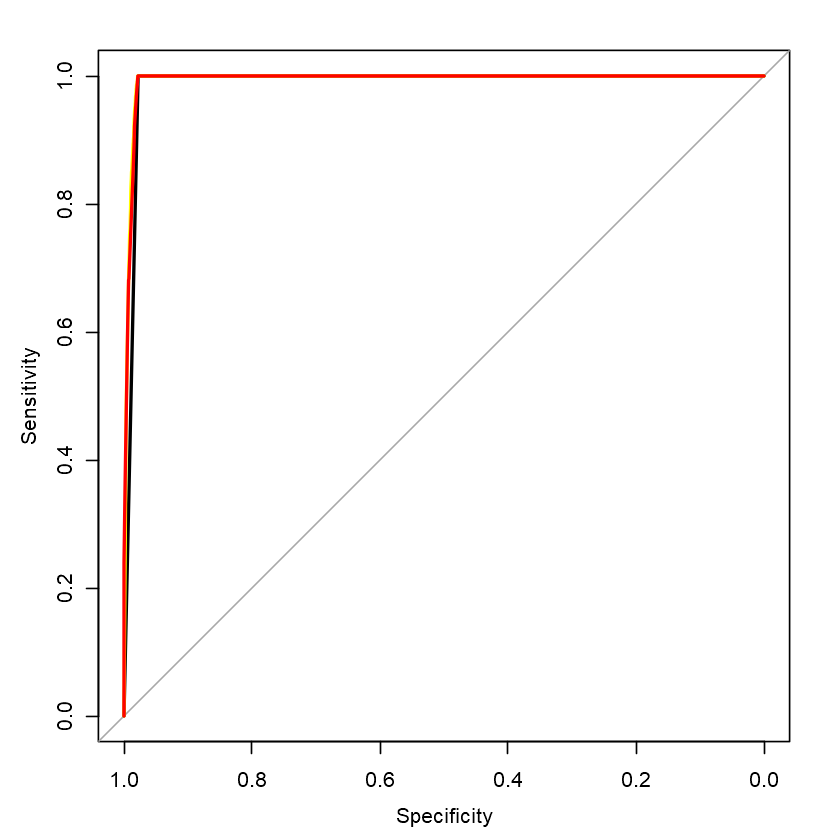

In [72]:
one=plot(roc(Test$applicant,rf_pred1[,2]))
two= lines(roc(Test$applicant,gbm_pred1[,2]),col="yellow")
three = lines(roc(Test$applicant,glm_pred1[,2]),col="red")

## From the above roc graph we can see that that red line seems to have the best fit. Which is GLM Model.

## 5. Select the best model and give actionable recommendation to the marketing department.

### Lets do some variable importance study to suggest recommendations to the marketing department.

In [80]:
tom1= varImp(model_rf)

In [81]:
tom1

rf variable importance

  only 20 most important variables shown (out of 84)

                                        Overall
prospect1                             100.00000
x.SourceProspects-Prospects             5.96743
x.SourceNo Data                         4.53555
x.DistancetoCampus_miles                3.03914
x.HouseholdIncome                       2.65054
x.GPA                                   0.69218
x.SourceNRCCUA-PurchaseNames            0.18921
x.GenderMale                            0.18881
x.StateNY                               0.16252
x.SourceCollegeBoard-Senior_Search      0.11318
x.StateNJ                               0.07807
x.SourceProspects-Other                 0.06864
x.StateMD                               0.06175
x.SourceCollegeBoard-Sophomore_Search   0.06129
x.SourceCollegeBoard-Juniors_Search     0.05954
x.StateCT                               0.05553
x.InStateY                              0.05296
x.StateIL                               0.03522
x.SourceCo

In [90]:
under_sam=under_sam[,!(names(under_sam) %in% c("prospect","x.Source"))]

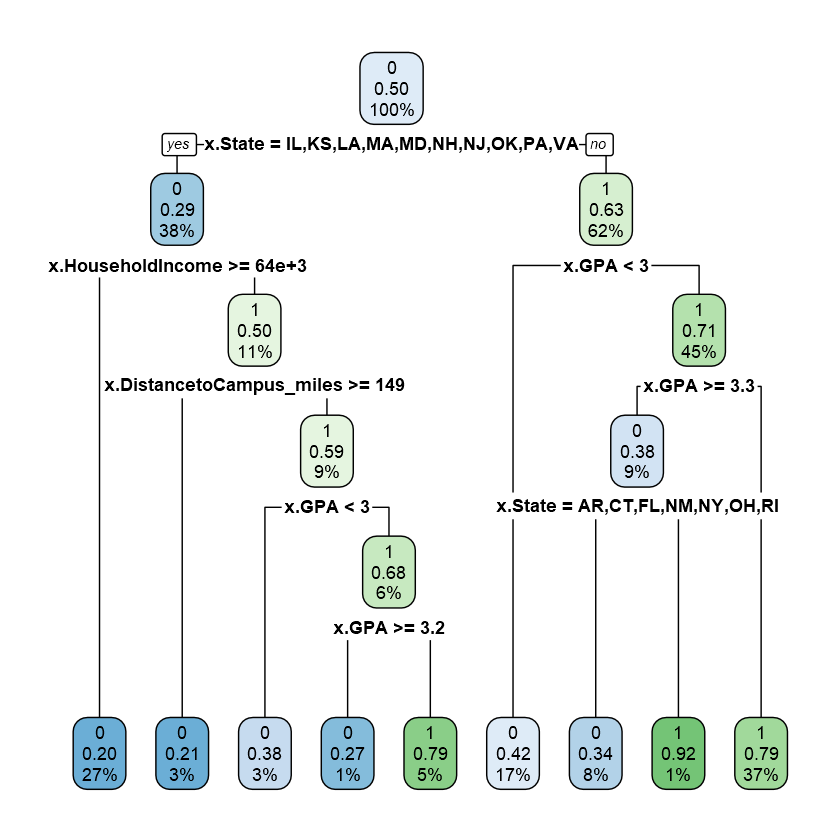

In [91]:
model.a <- rpart(applicant~.,
data=under_sam,
method="class")
rpart.plot(model.a)

From the above importance listing and tree we can infer that:

1) Student from particular states have high probability of applying and should be targeted more.

2) Students distance to campus greter than 149 miles have high probability of not applying with 0.59 prob, hence the college should market more around the college area.

3) Students with household income greater than 64e+3 have higher probability of applying.

4) Students with gre greter than 3.3 has 79% chances of applying so they should be targeted over other students.